<h1>Final Project - Unsupervised Learning</h1>

<h3>Clustering the Countries by using Unsupervised Learning for HELP International</h3>

* __Introduction__

    HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

    HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

* __Objective__

    1. To categorise the countries using socio-economic and health factors that determine the overall development of the country. 
    
    2. This is a __unsupervised learning__ and __classification__ task.

* __Attribute Information__

    __country__    : Name of the country

    __child_mort__ : Death of children under 5 years of age per 1000 live births
    
    __exports__    : Exports of goods and services per capita. Given as %age of the GDP per capita
    
    __health__     : Total health spending per capita. Given as %age of GDP per capita
    
    __imports__    : Imports of goods and services per capita. Given as %age of the GDP per capita
    
    __income__     : Net income per person
    
    __inflation__  : The measurement of the annual growth rate of the Total GDP
    
    __life_expec__ : The average number of years a new born child would live if the current mortality patterns are to remain the same
    
    __total_fer__  : The number of children that would be born to each woman if the current age-fertility rates remain the same.
    
    __gdpp__       : The GDP per capita. Calculated as the Total GDP divided by the total population.

* __Approach__

    To achieve the objectives of this project, I developed two methods for feature engineering. First, based on correlation analysis, I selected three key features. Second, I applied Principal Component Analysis (PCA) to the original features and used the resulting components as an alternative set of features. Then, using these features as inputs for K-means and Hierarchical Clustering algorithms, I identified the countries in the direst need of aid. The project is organized into five main phases:

    1. **Data Preprocessing**: Calculate Human Development Index for development categorization and prepare the data for exploratory data analysis

        The **Human Development Index (HDI)**, created by _United Nation Development Programme_, emphasizes that people and their capabilities should be the ultimate criteria for assessing the development of a country, not economic growth alone. It is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and having a decent standard of living. The HDI is the geometric mean of normalized indices for each of the three dimensions. For more information about HDI, please refer to the references.

        Since the dataset lacks education data, I calculated the HDI using only `income` and `life_expec`, maintaining the same formula structure. Countries can be grouped into four development categories based on their HDI scores:

        * __Low__: HDI $<0.55$

        * __Medium__: $0.55\leq$ HDI $<0.699$

        * __High__: HDI $0.7\leq$ HDI $<0.799$

        * __Very High__: HDI $\geq0.8$

        These categories allow for more effective visualization of the dataset, providing insights in the EDA section. However, I must clarify that these categories do not represent the final classification for this project; they are designed solely to visualize countries with similar conditions.
        
    2. **Exploratory Data Analysis (EDA)**: Let's make some plots to better understand the dataset

        In this section, I created several types of plots, such as scatter plots, histograms, and treemaps, to explore the relationships between features.

    3. **Feature Engineering**: Identify key features as inputs for the models

        To meet the project's goals, __the features should include socio-economic and health factors__. Based on the correlation analysis, I selected three features as the first set of inputs, and some features may be recalculated based on their properties. On the other hand, I also applied **Principal Component Analysis (PCA)** to the original features and used the PCA componets as another set of inputs.

    4. **Unsupervised Learning**: Use **K-means** and __Hierarchical Clustering__ to cluster countries

        The model partitioned the dataset into distinct clusters. Based on cluster attributes, such as `income` or `life_expec`, I classified the clusters into two or three status: __Priority Aid__, __Selective Aid__ and __No Aid__. The status and the corresponding countries are visualized using choropleth maps.

    5. **Conclusion**: Summarize the findings of this project

* __Reference__

    1. [Dataset](https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data)

    2. [HDI - Formula](https://en.wikipedia.org/wiki/Human_Development_Index)

    3. [HDI - Introduction & Classification](https://hdr.undp.org/data-center/human-development-index#/indicies/HDI)

    4. [List of countries by GNI (PPP) per capita](https://en.wikipedia.org/wiki/List_of_countries_by_GNI_(PPP)_per_capita)

    The following two articles were invaluable in completing this project, and some code was adapted from them:

    1. [PCA Visualization](https://medium.com/data-science/5-pca-visualizations-you-must-try-on-your-next-data-science-project-148ec3d31e4d)

    2. [Clustering: PCA| K-Means - DBSCAN - Hierarchical |](https://www.kaggle.com/code/tanmay111999/clustering-pca-k-means-dbscan-hierarchical#Modeling)

* __Github Repo__ (https://github.com/IvanLiuTW/Projects.git)

    You can find my work [here](https://github.com/IvanLiuTW/Projects.git) on my Github repo.

In [ ]:
# Packages

# Data process
import numpy as np
import pandas as pd
from pathlib import Path

# Plot
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Unsupervised learning
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree


# Configuration
import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

# Colors
mycolors = {
    "blue" : "#284e6e", 'misty_blue' : '#b4ccd1', 'mid_blue' : '#93a9bd', 'cadetblue' : '#5f9ea0',  
    "blue_velvet" : "#0b6a89", "blue_whale" : "#1C3041",  
    "red" : "#a76c6e", "rose" : '#e3242b', "fox" : "#c7522a", "wine" : "#9B1D20",
    "merigold" : "#eea221", "cantaloupe" : "#fda172", "amber" : "#ffbf00", "pimpkin_cat" : "#F07605",
    "green" : "#6a9373", "mid_green" : "#d6dabc", "into_green" : "#0B6E4F",
    "grape_candy" : "#895884", "eternal_summer" : "#F5E400",
    'burlywood' : '#deb887', "smoke" : "#f2f2f2",
    'title' : '#152544', 'label' : '#1e3e58'}

palette = [mycolors['fox'], mycolors['merigold'], mycolors['mid_blue'], mycolors['mid_green']]

# Updating the rcParams in Matplotlib & plot setting
params = {
    'figure.figsize': [12, 8],
    'font.size': 14,
    'axes.titleweight':'bold',
    'font.family' : 'Lato',
    'axes.spines.top': False,  
    'axes.spines.right': False
}
plt.rcParams.update(params)

sns.set_context('notebook')
sns.set_style("whitegrid", {"axes.grid": False})
figsize = (16, 9)
font_t = {'family' : 'Lato', 'color' : mycolors['title'], 'style' : 'oblique', 'fontsize' : 18, 'fontweight' : 'bold'}
font_l = {'family' : 'Nunito', 'fontsize' : 14, 'color' : mycolors['label'], 'fontweight' : 'bold'}
font_st = {'family' : 'Lato', 'color' : mycolors['title'], 'fontsize' : 16,}
pic_path = "./Figs"

In [2]:
# Plot helper function

# Format the plot title
def format_title(title, subtitle=None, subtitle_font_size=18):
    title = f'<i><b>{title}</b></i>'
    if not subtitle:
        return title
    subtitle = f'<span style="font-size: {subtitle_font_size}px;">{subtitle}</span>'
    return f'{title}<br>{subtitle}'

custom_template = {
    "layout": go.Layout(
        font={
            "family": "Nunito",
            "size": 16,
            "color": "#707070",
        },
        title={
            "font": {
                "family": "Lato",
                "size": 26,
                "color": mycolors['title'],
            },
        },
        plot_bgcolor="#ffffff",
        paper_bgcolor="#ffffff",
        colorway=px.colors.qualitative.G10,
    )
}

# Data Preprocessing

In [3]:
# Attributes information
data_info = pd.read_csv("./data/data-dictionary.csv")
print("Attributes information:")
for row in data_info.itertuples(index=False):
    print(f"{row[0]: ^10} : {row[1]}")

Attributes information:
 country   : Name of the country
child_mort : Death of children under 5 years of age per 1000 live births
 exports   : Exports of goods and services per capita. Given as %age of the GDP per capita
  health   : Total health spending per capita. Given as %age of GDP per capita
 imports   : Imports of goods and services per capita. Given as %age of the GDP per capita
  Income   : Net income per person
Inflation  : The measurement of the annual growth rate of the Total GDP
life_expec : The average number of years a new born child would live if the current mortality patterns are to remain the same
total_fer  : The number of children that would be born to each woman if the current age-fertility rates remain the same.
   gdpp    : The GDP per capita. Calculated as the Total GDP divided by the total population.


In [3]:
# Load the data
df = pd.read_csv("./data/Country-data.csv")
# Order the columns for better comparison in EDA
col_order = ['income', 'gdpp', 'inflation', 'imports', 'exports', 'health', 'life_expec', 'total_fer', 'child_mort']
hue = 'country'
df = df.loc[:, [hue] + col_order]
print(f"Data shape: {df.shape}")
df.head()

Data shape: (167, 10)


,country,income,gdpp,inflation,imports,exports,health,life_expec,total_fer,child_mort
0,Afghanistan,1610,553,9.44,44.9,10.0,7.58,56.2,5.82,90.2
1,Albania,9930,4090,4.49,48.6,28.0,6.55,76.3,1.65,16.6
2,Algeria,12900,4460,16.10,31.4,38.4,4.17,76.5,2.89,27.3
3,Angola,5900,3530,22.40,42.9,62.3,2.85,60.1,6.16,119.0
4,Antigua and Barbuda,19100,12200,1.44,58.9,45.5,6.03,76.8,2.13,10.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   income      167 non-null    int64  
 2   gdpp        167 non-null    int64  
 3   inflation   167 non-null    float64
 4   imports     167 non-null    float64
 5   exports     167 non-null    float64
 6   health      167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   child_mort  167 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
# Check missing values
df[df.isna()].sum()

country         0
income        0.0
gdpp          0.0
inflation     0.0
imports       0.0
exports       0.0
health        0.0
life_expec    0.0
total_fer     0.0
child_mort    0.0
dtype: object

* __No missing values__ in the data.

In [ ]:
df.describe()

,income,gdpp,inflation,imports,exports,health,life_expec,total_fer,child_mort
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,17144.688623,12964.155689,7.781832,46.890215,41.108976,6.815689,70.555689,2.947964,38.270060
std,19278.067698,18328.704809,10.570704,24.209589,27.412010,2.746837,8.893172,1.513848,40.328931
min,609.000000,231.000000,-4.210000,0.065900,0.109000,1.810000,32.100000,1.150000,2.600000
25%,3355.000000,1330.000000,1.810000,30.200000,23.800000,4.920000,65.300000,1.795000,8.250000
50%,9960.000000,4660.000000,5.390000,43.300000,35.000000,6.320000,73.100000,2.410000,19.300000
75%,22800.000000,14050.000000,10.750000,58.750000,51.350000,8.600000,76.800000,3.880000,62.100000
max,125000.000000,105000.000000,104.000000,174.000000,200.000000,17.900000,82.800000,7.490000,208.000000


In [4]:
### Calculate Human Development Index (HDI)
# Income index (II)
II = df['income'].apply(lambda x: (np.log(x) - np.log(100)) / np.log(750))
# Life Expectancy Index (LEI)
LEI = df['life_expec'].apply(lambda x: (x - 20) / 65)

# Human Development Index
df['HDI'] = np.sqrt(II * LEI)
df['HDI'].describe()

count    167.000000
mean       0.725013
std        0.157323
min        0.275952
25%        0.612023
50%        0.750025
75%        0.839791
max        0.992985
Name: HDI, dtype: float64

In [5]:
# HDI Classification
bins = [0, .55, .7, .8, 1]
group_names = ['Low', 'Medium', 'High', 'Very High']
df['level'] = pd.cut(df['HDI'], bins, labels=group_names, right=False)
df['level'] = df['level'].cat.set_categories(group_names, ordered=True)
df.groupby(['level'])['country'].count()

level
Low          30
Medium       34
High         41
Very High    62
Name: country, dtype: int64

In [6]:
# Compute trade balance
df['trade_balance'] = df['exports'] - df['imports']

# EDA

In [ ]:
# Attributes information
data_info = pd.read_csv("./data/data-dictionary.csv")
print("Attributes information:")
for row in data_info.itertuples(index=False):
    print(f"{row[0]: ^10} : {row[1]}")

Attributes information:
 country   : Name of the country
child_mort : Death of children under 5 years of age per 1000 live births
 exports   : Exports of goods and services per capita. Given as %age of the GDP per capita
  health   : Total health spending per capita. Given as %age of GDP per capita
 imports   : Imports of goods and services per capita. Given as %age of the GDP per capita
  Income   : Net income per person
Inflation  : The measurement of the annual growth rate of the Total GDP
life_expec : The average number of years a new born child would live if the current mortality patterns are to remain the same
total_fer  : The number of children that would be born to each woman if the current age-fertility rates remain the same.
   gdpp    : The GDP per capita. Calculated as the Total GDP divided by the total population.


## Overall

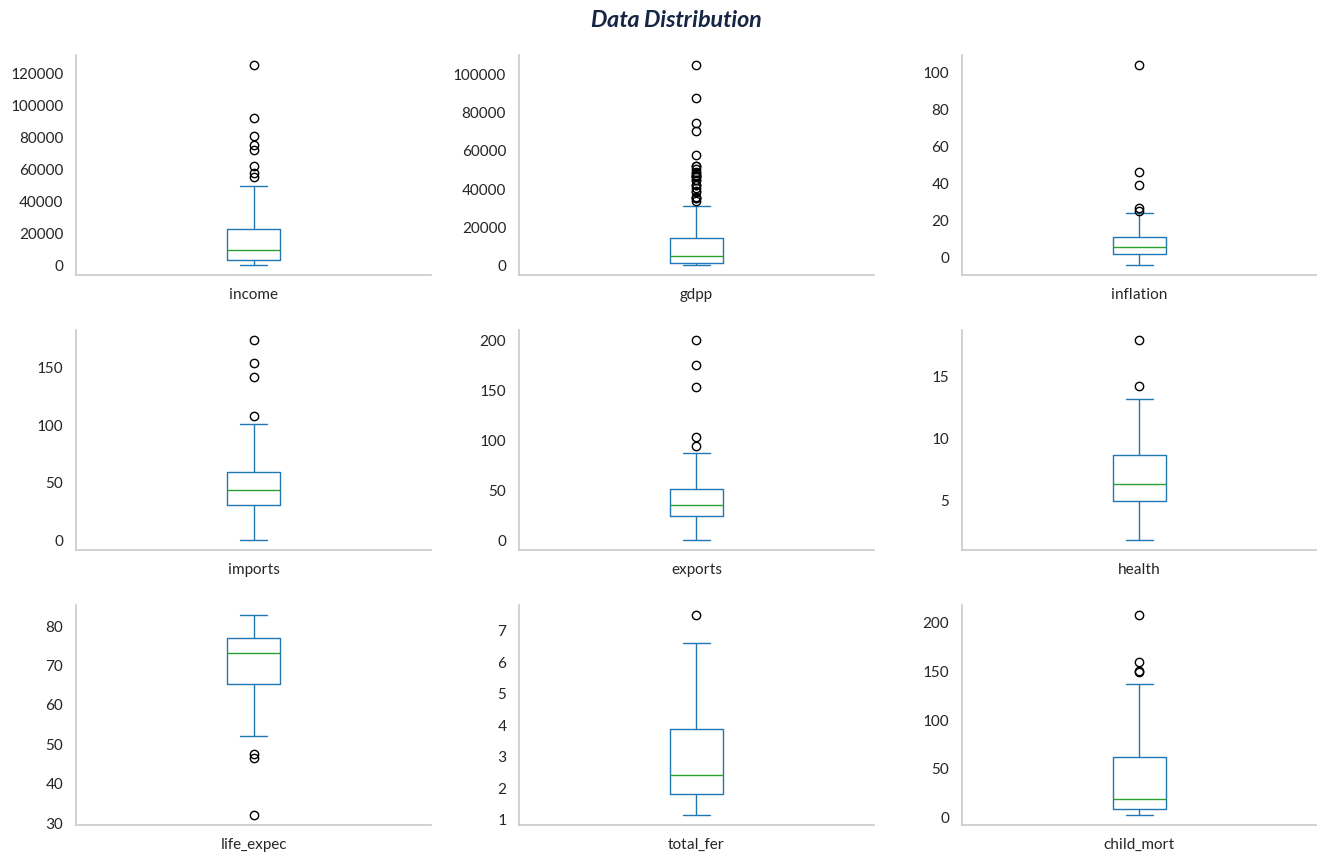

In [351]:
# Data Distribution
fig, ax = plt.subplots(3, 3, figsize=(16, 10),)
df.loc[:, col_order].plot(
    kind='box',
    subplots=True,
    sharey=False,
    ax=ax,
)
fig.suptitle('Data Distribution', fontdict=font_t, weight='bold', y=.925)
plt.subplots_adjust(wspace=.25, hspace=.25, )
plt.savefig(f"{pic_path}/Data Distribution - boxplot.png", dpi=300, transparent=True);

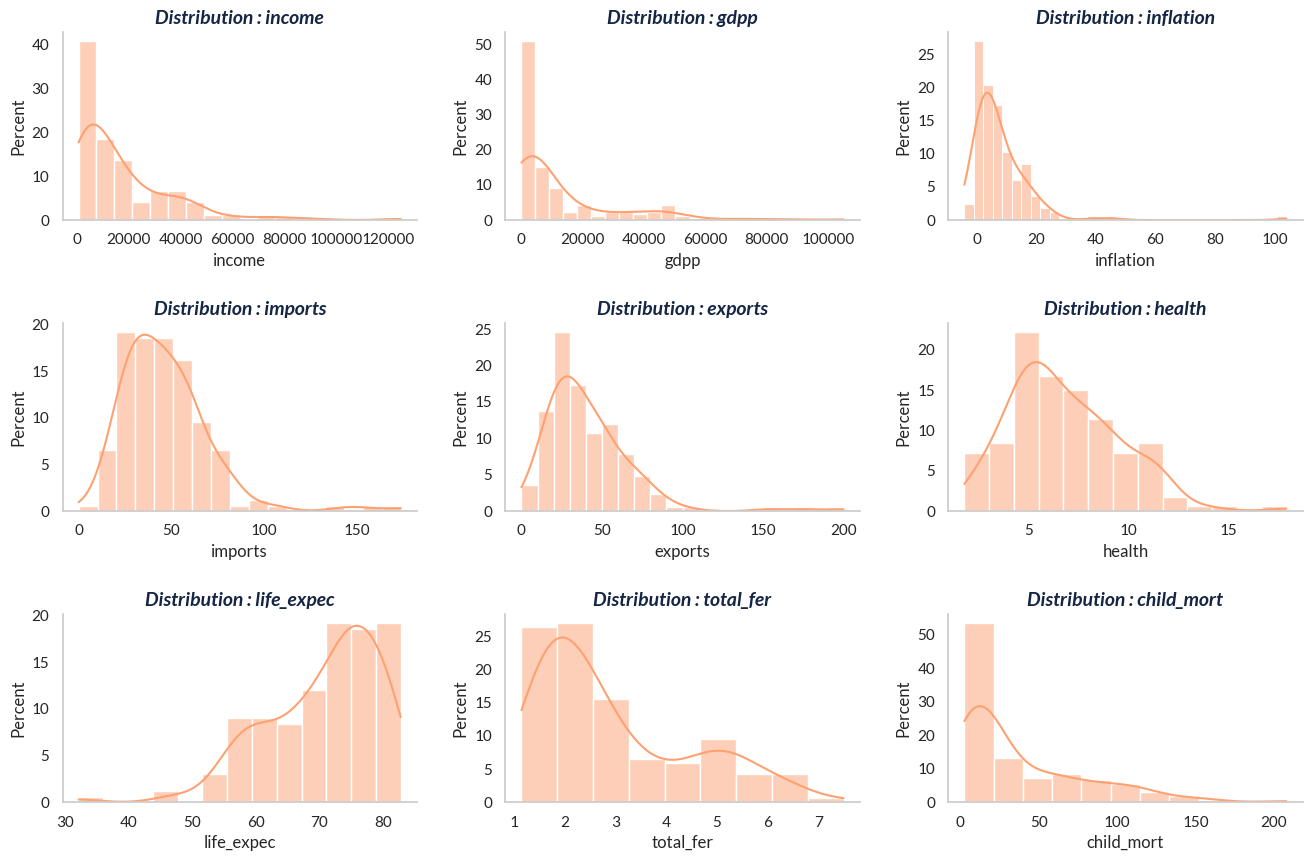

In [31]:
# Data Distribution
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16,10),)

for i, ax in zip(range(len(col_order)), axes.flatten()):
    sns.histplot(
        df[col_order[i]], 
        stat='percent',
        color=mycolors['cantaloupe'], kde=True, ax=ax)
    
    plt.subplots_adjust(wspace=.25, hspace=.55,)
    title = f'Distribution : {col_order[i]}'
    ax.set_title(title, fontdict=font_t, fontsize=14)
    
plt.savefig(f"{pic_path}/Data Distribution - histplot.png", dpi=300, transparent=True);

## Individual

In [153]:
fig = px.bar(
    df.sort_values(by='income', ascending=True), 
    x='income', y='country', 
    template=custom_template,
    text_auto='.2s', 
    title="Country Ordered by Income",)

fig.update_layout(
    height = 2000, width = 800,
    margin = dict(t=50, l=250, r=250, b=50),
    )

fig.update_traces(textfont_size=14, textangle=0, textposition="outside", cliponaxis=False, )
fig.show()

In [ ]:
fig = px.bar(
    df.sort_values(by='income', ascending=True), 
    x='income', y='country', color='level',
    template=custom_template,
    color_discrete_sequence=palette, # Set color
    category_orders={'color': group_names}, # Set color order
    text_auto='.2s', 
    title="Country Grouped By HDI Level Ordered by Income")

fig.update_layout(
    height = 2000, width = 800,
    margin = dict(t=50, l=250, r=250, b=50),
    )

fig.update_traces(textfont_size=14, textangle=0, textposition="outside", cliponaxis=False, )
fig.show()

* The barplots above demonstrate that grouping countries by development category offers a more insightful perspective than examining each country separately. Grouping the dataset by development level makes Treemaps a handy visualization tool. Thus, to explore attributes not included in the HDI, I'll use Treemaps for the following visualization. Additionally, since Treemaps won't accept negative values, barplots would be used to visualize `inflation` and `trade_balance`.

In [ ]:
# Use treemap to visualize the HDI level with other attributes
fig = px.treemap(
    df, 
    path=[px.Constant("World"), 'level', 'country'], 
    values='gdpp', 
    color='HDI', 
    color_continuous_scale='RdBu',
    color_continuous_midpoint=.55, # Use Low HDI level as midpoint
    title=format_title("GDPP By HDI Level"),
    template=custom_template,
    )

fig.update_traces(
    textinfo="label",
    textposition="middle center",
    hovertemplate='Country=%{label}<br>GDPP=%{value}<extra></extra>',
    texttemplate='%{label: labels } <br> %{value: 0.2s}',
    marker=dict(cornerradius=5) # Rounded corner
)

fig.update_layout(height=700, width=1500, margin=dict(t=70, l=25, r=25, b=25),)
fig.update_layout(paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor="rgba(0,0,0,0)")
fig.write_image(f"{pic_path}/Treemap - GDPP By HDI Level.png", scale=3, width=1500, height=720, )
fig.write_html(f"{pic_path}/inter - Treemap - GDPP By HDI Level.html", )
fig.show()

In [ ]:
# Use treemap to visualize the HDI level with other attributes
fig = px.treemap(
    df, 
    path=[px.Constant("World"), 'level', 'country'], 
    values='total_fer', 
    color='HDI', 
    color_continuous_scale='RdBu',
    color_continuous_midpoint=.55, # Use Low HDI level as midpoint
    title=format_title("Total Fertility By HDI Level"),
    custom_data=['HDI'],
    template=custom_template,
    )

fig.update_traces(
    textinfo="label",
    textposition="middle center",
    hovertemplate='Country=%{label}<br>Total Fertility=%{value}<br>HDI=%{customdata:.3f}<extra></extra>',
    texttemplate='%{label: labels } <br> %{value: 0.2f}',
    marker=dict(cornerradius=5) # Rounded corner
)

fig.update_layout(height=700, width=1500, margin=dict(t=70, l=25, r=25, b=25),)
fig.update_layout(paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor="rgba(0,0,0,0)")
# fig.write_image(f"{pic_path}/Treemap - Total Fertility By HDI Level.png", scale=3, width=1500, height=720, )
# fig.write_html(f"{pic_path}/inter - Treemap - Total Fertility By HDI Level.html", )
fig.show()

In [ ]:
# Use treemap to visualize the HDI level with other attributes
fig = px.treemap(
    df, 
    path=[px.Constant("World"), 'level', 'country'], 
    values='child_mort', 
    color='HDI', 
    color_continuous_scale='RdBu',
    color_continuous_midpoint=.55, # Use Low HDI level as midpoint
    title=format_title("Child Mortality By HDI Level"),
    custom_data=['HDI'],
    template=custom_template,
    )

fig.update_traces(
    textinfo="label",
    textposition="middle center",
    hovertemplate='Country=%{label}<br>Child Mortality=%{value}<br>HDI=%{customdata:.3f}<extra></extra>',
    texttemplate='%{label: labels } <br> %{value: 0.2f}',
    marker=dict(cornerradius=5) # Rounded corner
)

fig.update_layout(height=700, width=1500, margin=dict(t=70, l=25, r=25, b=25),)
fig.update_layout(paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor="rgba(0,0,0,0)")
# fig.write_image(f"{pic_path}/Treemap - Child Mortality By HDI Level.png", scale=3, width=1500, height=720, )
fig.write_html(f"{pic_path}/inter - Treemap - Child Mortality By HDI Level.html", )
fig.show()

In [ ]:
idx = df.groupby(['level'])['health'].nlargest(10,).reset_index()['level_1']
temp = df.iloc[idx, :]

fig = px.treemap(
    temp, 
    path=[px.Constant("World"), 'level', 'country',], 
    values='health',
    color='HDI', 
    color_continuous_scale='RdBu',
    color_continuous_midpoint=.55, # Use Low HDI level as midpoint
    title=format_title("Health By HDI Level"),
    custom_data=['HDI'],
    template=custom_template
    )

fig.update_traces(
    textinfo="label",
    textposition="middle center",
    hovertemplate='Country=%{label}<br>Health=%{value}<br>HDI=%{customdata:.3f}<extra></extra>',
    texttemplate='%{label: labels } <br> %{value: 0.2f}',
    marker=dict(cornerradius=5) # Rounded corner
)

fig.update_layout(height=720, width=1280, margin=dict(t=70, l=25, r=25, b=25),)
fig.update_layout(paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor="rgba(0,0,0,0)")
# fig.write_image(f"{pic_path}/Treemap - Health By HDI Level.png", scale=3, width=1280, height=720, )
fig.write_html(f"{pic_path}/inter - Treemap - Health By HDI Level.html", )
fig.show()

In [ ]:
idx = df.groupby(['level'])['imports'].nlargest(10,).reset_index()['level_1']
temp = df.iloc[idx, :]

fig = px.treemap(
    temp, 
    path=[px.Constant("World"), 'level', 'country',], 
    values='imports',
    color='HDI', 
    color_continuous_scale='RdBu',
    color_continuous_midpoint=.55, # Use Low HDI level as midpoint
    title=format_title("Imports By HDI Level"),
    custom_data=['HDI'],
    template=custom_template
    )


fig.update_traces(
    textinfo="label",
    textposition="middle center",
    hovertemplate='Country=%{label}<br>Imports=%{value}<br>HDI=%{customdata:.3f}<extra></extra>',
    texttemplate='%{label: labels } <br> %{value: 0.2s}',
    marker=dict(cornerradius=5) # Rounded corner
)

fig.update_layout(height=720, width=1280, margin=dict(t=70, l=25, r=25, b=25),)
fig.update_layout(paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor="rgba(0,0,0,0)")
# fig.write_image(f"{pic_path}/Treemap - Imports By HDI Level.png", scale=3, width=1280, height=720, )
fig.write_html(f"{pic_path}/inter - Treemap - Imports By HDI Level.html", )
fig.show()

In [ ]:
idx = df.groupby(['level'])['exports'].nlargest(10,).reset_index()['level_1']
temp = df.iloc[idx, :]

fig = px.treemap(
    temp, 
    path=[px.Constant("World"), 'level', 'country',], 
    values='exports',
    color='HDI', 
    color_continuous_scale='RdBu',
    color_continuous_midpoint=.55, # Use Low HDI level as midpoint
    title=format_title("Exports By HDI Level"),
    custom_data=['HDI'],
    template=custom_template
    )

fig.update_traces(
    textinfo="label",
    textposition="middle center",
    hovertemplate='Country=%{label}<br>Exports=%{value}<br>HDI=%{customdata:.3f}<extra></extra>',
    texttemplate='%{label: labels } <br> %{value: 0.2s}',
    marker=dict(cornerradius=5) # Rounded corner
)

fig.update_layout(height=720, width=1280, margin=dict(t=70, l=25, r=25, b=25),)
fig.update_layout(paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor="rgba(0,0,0,0)")
# fig.write_image(f"{pic_path}/Treemap - Exports By HDI Level.png", scale=3, width=1280, height=720, )
fig.write_html(f"{pic_path}/inter - Treemap - Exports By HDI Level.html", )
fig.show()

In [ ]:
# Filter the top 5 and bottom 5 countries by trade balance
idx0 = df['trade_balance'].nlargest(5,).index
idx1 = df['trade_balance'].nsmallest(5,).index
idx = idx0.append(idx1)
temp = df.iloc[idx, :]

# Colors for positive and negative bars
barcolors = [mycolors['blue']] * 5 + [mycolors['red']] * 5
fig = px.bar(
    temp, 
    y='trade_balance', x='country', 
    template=custom_template,
    text_auto='.2f', 
    color=barcolors,
    title=format_title("Trade Balance", subtitle="(Top 5 and Bottom 5)"),
)

# Add HDI level
for i in range(len(temp)):
    fig.add_annotation(
            x=temp.iat[i, 0],
            y=temp.iat[i, 12] + 8 if i < 5 else 5,
            xref="x",
            yref="y",
            text=f"<i>{temp.iat[i, -2]}</i>",
            showarrow=False,)
    
fig.update_layout(
    height=720, width=1280,
    margin=dict(t=50, l=50, r=25, b=50),
    showlegend=False
    )

fig.update_traces(textfont_size=14, textangle=0, textposition="outside", cliponaxis=False,)

fig.update_layout(paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor="rgba(0,0,0,0)")
fig.write_image(f"{pic_path}/Bar - Trade Balance.png", scale=3, width=1280, height=720, )
# fig.write_html(f"{pic_path}/inter - Treemap - Imports By HDI Level.html", )
fig.show()

In [ ]:
# Filter the top 5 and bottom 5 countries by inflation rate
idx0 = df['inflation'].nlargest(5,).index
idx1 = df['inflation'].nsmallest(5,).index
idx = idx0.append(idx1)
temp = df.iloc[idx, :]

# Colors for positive and negative bars
barcolors = [mycolors['blue']] * 5 + [mycolors['red']] * 5
fig = px.bar(
    temp, 
    y='inflation', x='country', 
    # text=,
    template=custom_template,
    text_auto='.2f', 
    color=barcolors,
    # color='HDI', 
    # color_continuous_scale='RdBu',
    # color_continuous_midpoint=.55, # Use Low HDI level as midpoint
    title=format_title("Inflation Rate", subtitle="(Top 5 and Bottom 5)"),
)

# Add HDI level
for i in range(len(temp)):
    fig.add_annotation(
            x=temp.iat[i, 0],
            y=temp.iat[i, 3] + 8 if i < 5 else 5,
            xref="x",
            yref="y",
            text=f"<i>{temp.iat[i, -1]}</i>",
            showarrow=False,)
    
fig.update_layout(
    height=720, width=1280,
    margin=dict(t=50, l=50, r=25, b=50),
    showlegend=False
    )

fig.update_traces(textfont_size=14, textangle=0, textposition="outside", cliponaxis=False,)

fig.update_layout(paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor="rgba(0,0,0,0)")
fig.write_image(f"{pic_path}/Bar - Inflation.png", scale=3, width=1280, height=720, )
# fig.write_html(f"{pic_path}/inter - Treemap - Imports By HDI Level.html", )
fig.show()

In [ ]:
df[df['inflation'] < 0]

,country,income,gdpp,inflation,imports,exports,health,life_expec,total_fer,child_mort,HDI,level,trade_balance
10,Bahamas,22900,28000,-0.393,43.7,35.0,7.89,73.8,1.86,13.8,0.824236,Very High,-8.7
43,Czech Republic,28300,19800,-1.430,62.9,66.0,7.88,77.5,1.51,3.4,0.868550,Very High,3.1
73,Ireland,45700,48700,-3.220,86.5,103.0,9.19,80.4,2.05,4.2,0.927197,Very High,16.5
77,Japan,35800,44500,-1.900,13.6,15.0,9.49,82.8,1.39,3.2,0.926403,Very High,1.4
85,Latvia,18300,11300,-0.812,55.1,53.7,6.68,73.1,1.36,7.8,0.801783,Very High,-1.4
131,Seychelles,20400,10800,-4.210,108.0,93.8,3.40,73.4,2.17,14.4,0.812384,Very High,-14.2
133,Singapore,72100,46600,-0.046,174.0,200.0,3.96,82.7,1.15,2.8,0.979219,Very High,26.0
135,Slovenia,28700,23400,-0.987,62.9,64.3,9.41,79.5,1.57,3.2,0.884624,Very High,1.4


<h2>Brief Summary</h2>

The visualization is split into two parts: one exploring all attributes together and another zooming in on a single attribute, grouped by HDI level.

1. In the first part, boxplots show that `gdpp` and `income` have significantly more outliers compared to other attributes, pointing to wide economic gaps between countries. The histograms, with the y-axis as a percentage, give a clear picture of each attribute’s distribution. Plus, the KDE lines reveal that all attributes are either right-skewed or left-skewed, suggesting a mix of conditions across countries or some extreme outliers.

2. For the second part, to dig into differences across HDI levels, I grouped the countries by HDI level. In order to use `gdpp`, `total_fer`, and `child_mort` to demonstrate the global trend, all countries were included. For other attributes, showing all 167 countries would’ve been overwhelming, so I picked the top 10 values within each level. Since HDI already captures `income` and `life_expec`, I skipped plotting those separately. Here’s what stood out:

    * __GDPP__ clearly illustrates the economic differences in the dataset. It gives a clear picture: the more developed a country, the higher its GDPP.

    * __Total fertility__ and __child mortality__ follow a familiar global trend: developed countries (like Singapore) have lower values than developing ones (like Niger).

    * __Health__ spending threw up something curious—some low HDI countries, like Sierra Leone and Liberia, spend a higher share of their GDP on health compared to high HDI countries like France and Switzerland. This might result from low HDI countries having smaller GDPs but health still taking a big chunk.

    * __Imports__, __exports__, and __trade balance__ suggest developed countries are generally better at exporting goods than developing ones. But some, like the U.S. and U.K., are import-dependent, possibly due to resource limits—landing them in trade deficits. Interestingly, the top five trade surplus countries in this dataset all rely on oil or gas exports.

    * __Inflation__ has a quirky twist: negative inflation rates only pop up in high HDI countries here. Also, no low HDI countries exist in the top five for high inflation. This hints that other factors, missing from the dataset, might be driving inflation.

# Feature Engineering

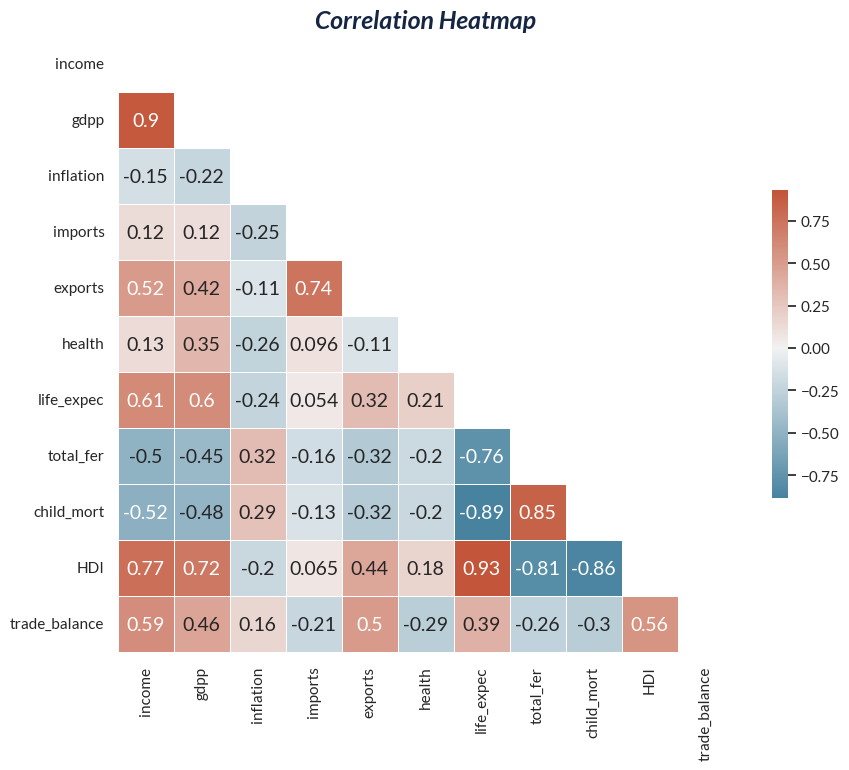

In [ ]:
# Compute the correlation matrix
corr = df.corr(numeric_only=True)

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            center=0,
            annot=True,
            square=True, linewidths=.5, 
            cbar_kws={"shrink": .5}, # Setting shrink to 0.5 makes the colorbar half its original size.
            ax=ax)

ax.set_title('Correlation Heatmap', fontdict=font_t);
# plt.savefig(f"{pic_path}/Correlation Heatmap.png", dpi=300, transparent=True);

<h3>Brief Summary</h3>

Based on the correlation between attributes and their definitions, here are some findings:

1. __HDI Correlations__:

    `HDI` is highly correlated with `income` and `life_expec` because it was computed using these two attributes. Additionally, HDI is highly correlated with `gdpp`, `total_fer`, and `child_mort`, which makes sense because `income` is strongly related to `gdpp`, and `life_expec` is strongly related to `total_fer` and `child_mort`.

2. __trade_balance Observations__:

    `trade_balance` does not highly correlate with `exports` and `imports` as I expected. It might be more appropriately measured in monetary units rather than as a percentage.

3. __health and inflation Insights__:

    `health` and `inflation` do not highly correlate with any other attributes. `health` represents health expenditure as a percentage of GDP, which may explain why it does not correlate strongly with health outcomes like `life_expec`, `total_fer`, and `child_mort`. Similarly, `inflation` measures the annual growth rate of total GDP, and since no other attributes directly relate to its calculation, its low correlation with other features is reasonable.

Based on this analysis, I selected `HDI`, `health`, `exports`, and `imports` as the features for the following modeling section. To make `health`, `exports`, and `imports` more representative and potentially more correlated with other attributes, I will convert them from percentages to monetary units. Additionally, I will combine `exports` and `imports` to calculate the trade balance in monetary terms.

In [7]:
# Featuring engineering
df['health_exp'] = (df['health'] / 100) * df['gdpp']
df['trade_balance'] = ((df['exports'] / 100) * df['gdpp']) - ((df['imports'] / 100) * df['gdpp'])
# First set of inputs
selected_features = ['HDI',  'health_exp', 'trade_balance']

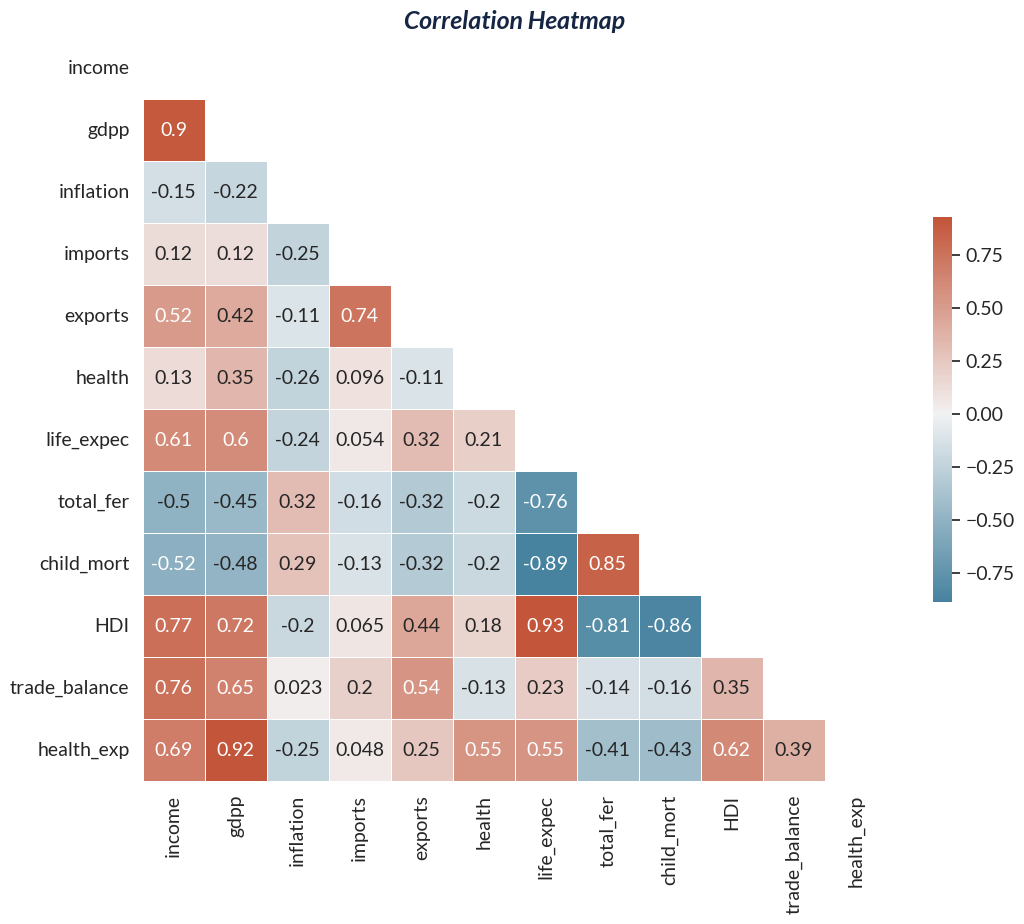

In [ ]:
# Compute the correlation matrix again
corr = df.corr(numeric_only=True)

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            center=0,
            annot=True,
            square=True, linewidths=.5, 
            cbar_kws={"shrink": .5}, # Setting shrink to 0.5 makes the colorbar half its original size.
            ax=ax)

ax.set_title('Correlation Heatmap', fontdict=font_t);
# plt.savefig(f"{pic_path}/Correlation Heatmap - After feature engineering.png", dpi=300, transparent=True);

## PCA

In [117]:
# Plot setting for PCA plots
import matplotlib.font_manager as font_manager

font_dir = ["Roboto_Condensed"]
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

plt.rcParams["figure.figsize"] = 10, 6
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["font.size"] = 16
plt.rcParams["figure.titlesize"] = "xx-large"
plt.rcParams["xtick.labelsize"] = "medium"
plt.rcParams["ytick.labelsize"] = "medium"
plt.rcParams["axes.axisbelow"] = True
plt.rcParams["font.family"] = "Roboto Condensed"

In [8]:
# Scale data before applying PCA
scaling = StandardScaler()
scaling.fit(df[col_order])
X = scaling.transform(df[col_order])

# Apply PCA
pca = PCA()
components = pca.fit_transform(X)
df_components = pd.DataFrame(components, columns=[f"PC{i+1}" for i in range(components.shape[1])])
df_components.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,0.254597,-0.383000,-0.415076,0.014148
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,-0.084579,-0.248919,0.221042,-0.173316
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,0.401696,0.087214,0.184162,-0.084037
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,0.547996,0.440835,0.355998,0.091339
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,0.206919,-0.241978,0.023681,-0.094270


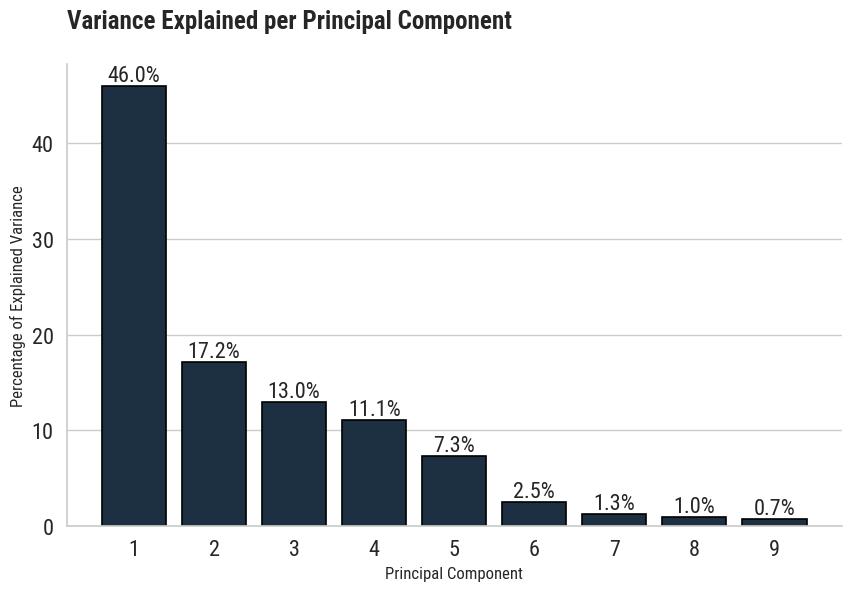

In [101]:
plot_y = [val * 100 for val in pca.explained_variance_ratio_]
plot_x = range(1, len(plot_y) + 1)

bars = plt.bar(plot_x, plot_y, align="center", color="#1C3041", edgecolor="#000000", linewidth=1.2)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.001, f"{yval:.1f}%", ha="center", va="bottom")

plt.xlabel("Principal Component")
plt.ylabel("Percentage of Explained Variance")
plt.title("Variance Explained per Principal Component", loc="left", fontdict={"weight": "bold", 'size' : 18}, y=1.06)
plt.grid(axis="y")
plt.xticks(plot_x)
plt.savefig(f"{pic_path}/PCA - Variance Explained per Principal Component.png", dpi=300, transparent=True);

plt.show()

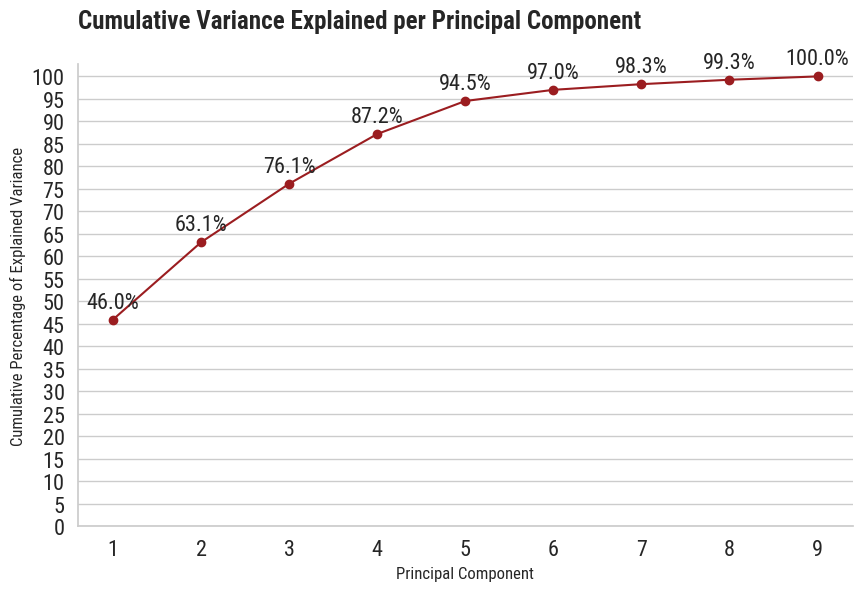

In [102]:
exp_var = [val * 100 for val in pca.explained_variance_ratio_]
plot_y = [sum(exp_var[:i+1]) for i in range(len(exp_var))]
plot_x = range(1, len(plot_y) + 1)

plt.plot(plot_x, plot_y, marker="o", color="#9B1D20")
for x, y in zip(plot_x, plot_y):
    plt.text(x, y + 1.5, f"{y:.1f}%", ha="center", va="bottom")

plt.xlabel("Principal Component")
plt.ylabel("Cumulative Percentage of Explained Variance")
plt.title("Cumulative Variance Explained per Principal Component", loc="left", fontdict={"weight": "bold", 'size' : 18}, y=1.06)

plt.yticks(range(0, 101, 5))
plt.grid(axis="y")
plt.xticks(plot_x)
plt.savefig(f"{pic_path}/PCA - Cumulative Variance Explained per Principal Component.png", dpi=300, transparent=True);

plt.show()

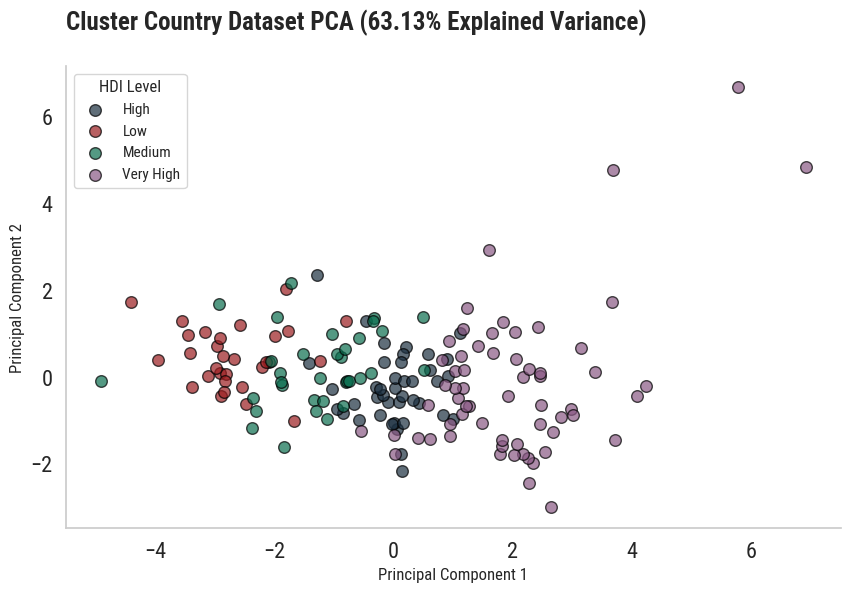

In [103]:
total_explained_variance = sum(pca.explained_variance_ratio_[:2]) * 100
colors = ["#1C3041", "#9B1D20", "#0B6E4F", "#895884", "#F07605", "#F5E400"]

pca_2d_df = pd.DataFrame(components[:, :2], columns=["PC1", "PC2"])
pca_2d_df["y"] = df["level"]

fig, ax = plt.subplots()
for i, target in enumerate(sorted(pca_2d_df["y"].unique())):
    subset = pca_2d_df[pca_2d_df["y"] == target]
    ax.scatter(x=subset["PC1"], y=subset["PC2"], s=70, alpha=0.7, c=colors[i], edgecolors="#000000", label=target)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"Cluster Country Dataset PCA ({total_explained_variance:.2f}% Explained Variance)", 
        loc="left", fontdict={"weight": "bold", 'size' : 18}, y=1.06)

ax.legend(title="HDI Level")
plt.savefig(f"{pic_path}/PCA - Cluster Country Dataset PCA.png", dpi=300, transparent=True);
plt.show()

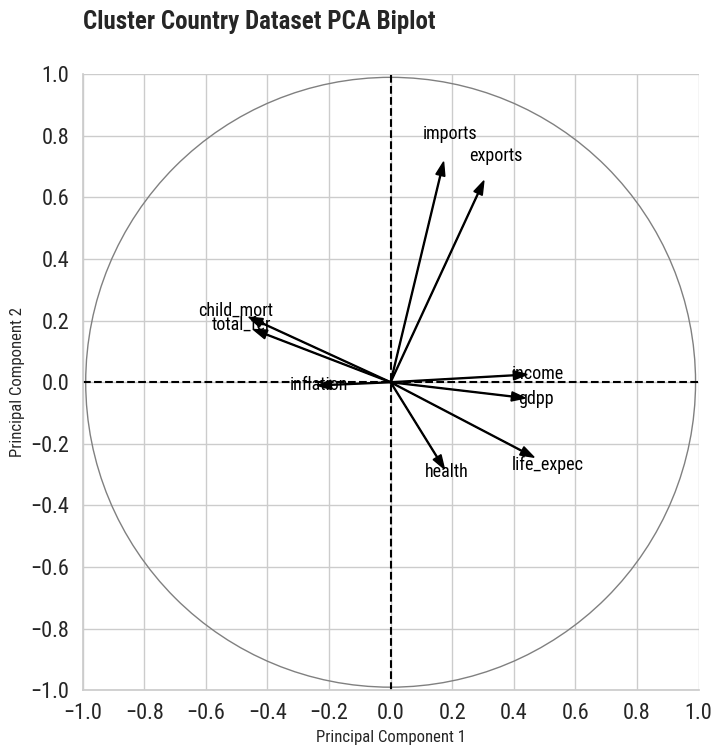

In [108]:
labels = col_order
n = len(labels)
coeff = np.transpose(pca.components_)
pc1 = pca.components_[:, 0]
pc2 = pca.components_[:, 1]

plt.figure(figsize=(8, 8))

for i in range(n):
    plt.arrow(x=0, y=0, dx=coeff[i, 0], dy=coeff[i, 1], color="#000000", width=0.003, head_width=0.03)
    plt.text(x=coeff[i, 0] * 1.2, y=coeff[i, 1] * 1.2, s=labels[i], size=13, color="#000000", ha="center", va="center")

plt.axis("square")
plt.title(f"Cluster Country Dataset PCA Biplot", loc="left", fontdict={"weight": "bold", "size" : 18}, y=1.06)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xticks(np.arange(-1, 1.1, 0.2))
plt.yticks(np.arange(-1, 1.1, 0.2))

plt.axhline(y=0, color="black", linestyle="--")
plt.axvline(x=0, color="black", linestyle="--")
circle = plt.Circle((0, 0), 0.99, color="gray", fill=False)
plt.gca().add_artist(circle)
plt.grid()

plt.savefig(f"{pic_path}/PCA - Cluster Country Dataset PCA Biplot.png", dpi=300, transparent=True);
plt.show()

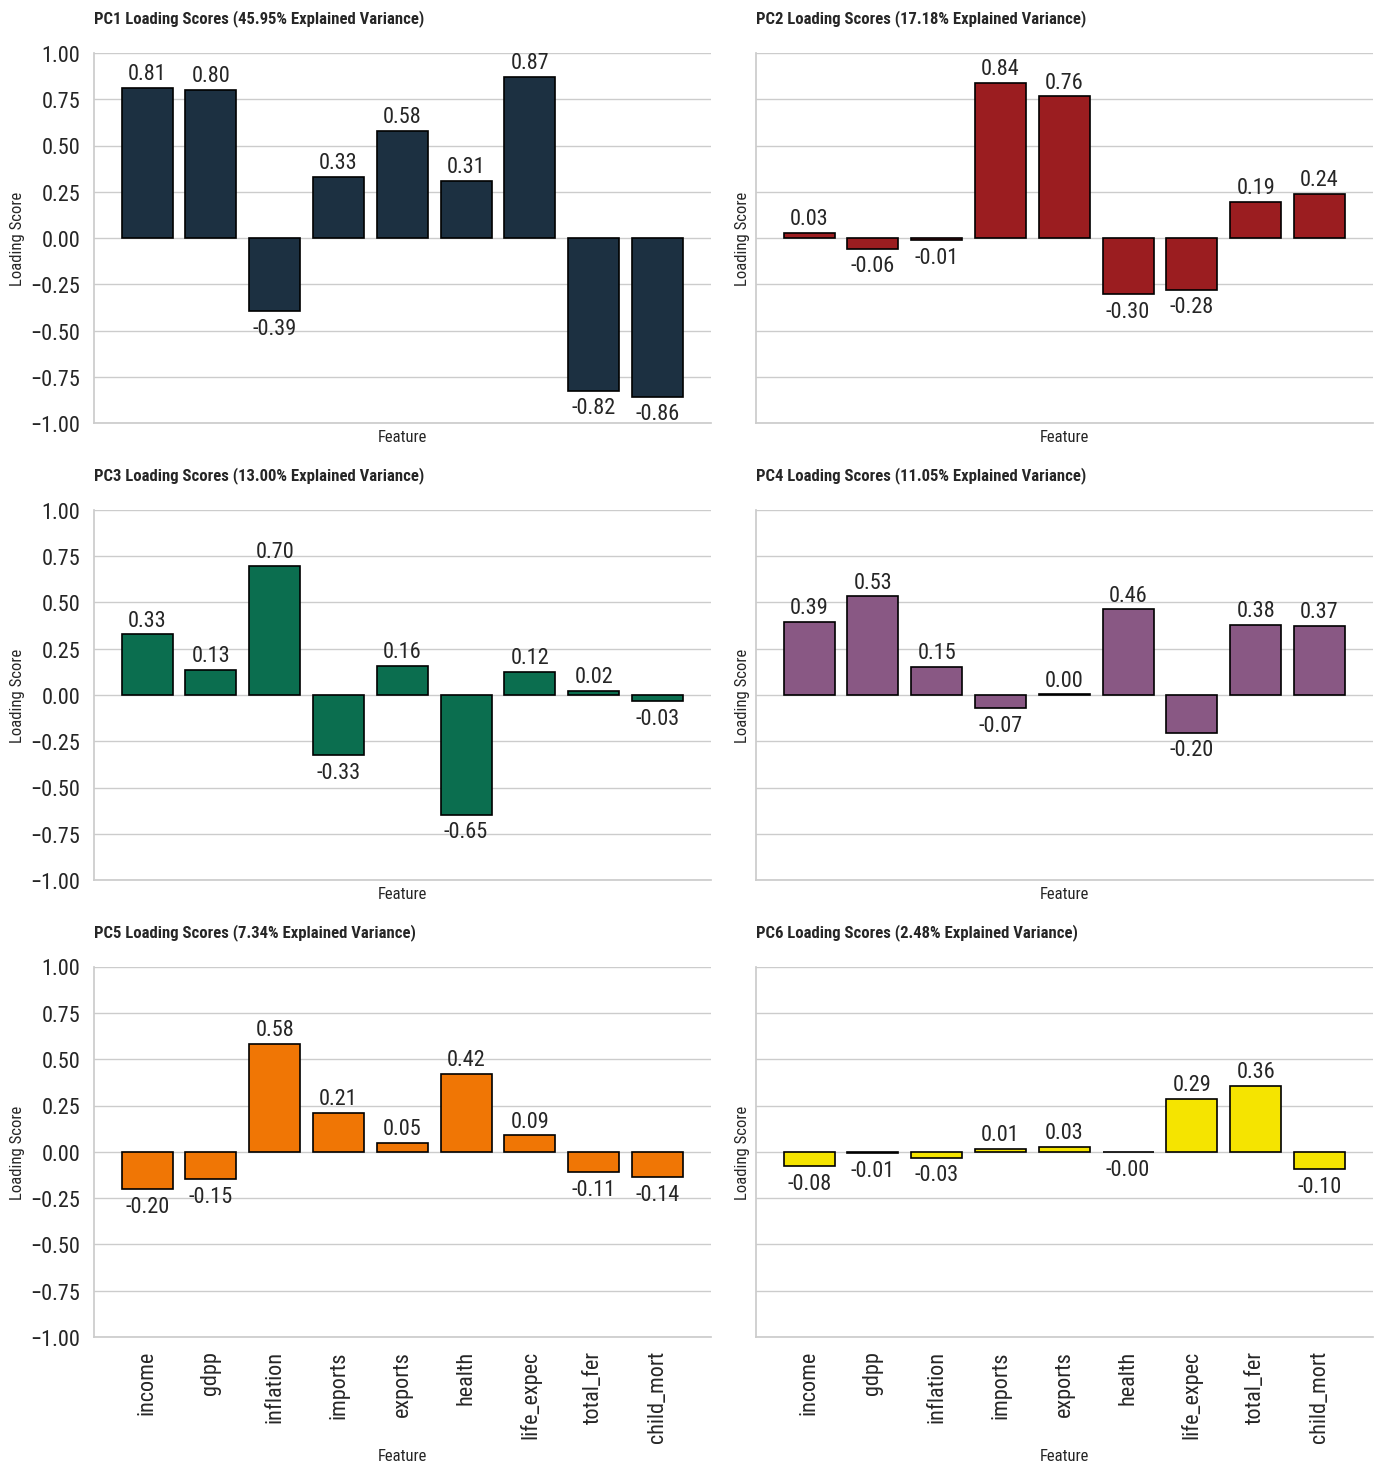

In [109]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f"PC{i}" for i in range(1, len(col_order) + 1)],
    index=col_order
)

fig, axs = plt.subplots(3, 2, figsize=(14, 15), sharex=True, sharey=True)
colors = ["#1C3041", "#9B1D20", "#0B6E4F", "#895884", "#F07605", "#F5E400"]

for i, ax in enumerate(axs.flatten()):
    explained_variance = pca.explained_variance_ratio_[i] * 100
    pc = f"PC{i+1}"
    bars = ax.bar(loadings.index, loadings[pc], color=colors[i], edgecolor="#000000", linewidth=1.2)
    ax.set_title(f"{pc} Loading Scores ({explained_variance:.2f}% Explained Variance)", loc="left", fontdict={"weight": "bold"}, y=1.06)
    ax.set_xlabel("Feature")
    ax.set_ylabel("Loading Score")
    ax.grid(axis="y")
    ax.tick_params(axis="x", rotation=90)
    ax.set_ylim(-1, 1)
    
    for bar in bars:
        yval = bar.get_height()
        offset = yval + 0.02 if yval > 0 else yval - 0.15
        ax.text(bar.get_x() + bar.get_width() / 2, offset, f"{yval:.2f}", ha="center", va="bottom")

plt.tight_layout()
plt.savefig(f"{pic_path}/PCA - Loading Scores of Each Component.png", dpi=300, transparent=True);
plt.show()

In [111]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(len(col_order)),
    color=df["level"],
    width=1400, height=1400,
    template=custom_template,
    color_discrete_sequence=palette, # Set color
    category_orders={'color': ['Low', 'Medium', 'High', 'Very High']}, # Set color order
)
fig.update_traces(diagonal_visible=False)
fig.update_layout(paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor="rgba(0,0,0,0)")
fig.write_image(f"{pic_path}/PCA - Component Scatter Matrix.png", scale=3, width=1400, height=1400, )
fig.write_html(f"{pic_path}/inter - PCA - Component Scatter Matrix.html", )
fig.show()

In [40]:
# pca = PCA(n_components=2)
# components = pca.fit_transform(X)

fig = px.scatter(
    components[:, [0, 1]], x=0, y=1,
    labels={'0': 'PC 1 (46%)', '1': 'PC 2 (17.2%)',},
    color=df["level"],
    width=720, height=720,
    template=custom_template,
    color_discrete_sequence=palette, # Set color
    category_orders={'color': ['Low', 'Medium', 'High', 'Very High']},
)
fig.show()

In [ ]:
# 3D plot
total_var = pca.explained_variance_ratio_[np.array([0, 1, 2])].sum() * 100

fig = px.scatter_3d(
    components[:,[0, 1, 2]], x=0, y=1, z=2, 
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    width=720, height=720,
    color=df["level"],
    template=custom_template,
    color_discrete_sequence=palette, # Set color
    category_orders={'color': ['Low', 'Medium', 'High', 'Very High']},
)
fig.show()

<h2>Brief Summary</h2>

Before discussing my findings, I would like to thank the article on visualizing PCA, [PCA Visualization](https://medium.com/data-science/5-pca-visualizations-you-must-try-on-your-next-data-science-project-148ec3d31e4d). It is the best PCA visualization article I have ever read, and I highly recommend it. The first five plots in my work are slightly revised versions of those in this article. If you are unsure how to interpret some of the plots, you can also refer to the article for more detailed explanation.

Now, turning to the PCA section. Applying PCA helps reduce the dimensionality of the dataset. To compare the model outputs using both the features I selected and the PCA features as inputs, I applied PCA to the original attributes, excluding the engineered features. There are several interesting findings from the PCA results.

1. The PCA biplot reveals patterns similar to the correlation relationships among the attributes. Specifically, the pairs (`life_expec`, `total_fer`, `child_mort`) and (`gdpp`, `income`) are highly correlated. Additionally, `inflation` contributes little to the principal components compared to other attributes, and `health` shows minimal correlation with the other features.

2. I used `plotly` to visualize the principal components in 2D and 3D plots, grouping them by `HDI level`. Again, note that the `HDI level` serves only as a reference for evaluating PCA performance and __cannot__ be considered the correct classification.
  
3. Including the first five components would explain nearly 95% of the variability. However, according to the plot of PCA loading scores, `inflation` and `health` have the highest weights in the fifth component. Given the earlier findings, I decided to include only the first four components instead of five.

# Modeling

* Deciding the Number of Clusters for K-means and Hierarchical Clustering

When you’re diving into clustering with algorithms like K-means and Hierarchical Clustering, one big question pops up: *how many clusters should I use?* Too few, and you might mash together patterns that don’t belong. Too many, and you’re just splitting hairs. That’s where some clever tools come in: the **Elbow Method** and **Silhouette Score** for K-means, and the **dendrogram** with **linkage functions** for Hierarchical Clustering. Let’s break it down in a way that’s clear, useful, and ready to drop into your project description.

---

* For K-means: Elbow Method and Silhouette Score

- **Elbow Method**:  
  Picture this: you’re running K-means with different numbers of clusters—say, 1 to 10. For each number (k), the algorithm calculates the sum of squared distances (SSE) from every data point to the center of its cluster. As k goes up, SSE drops because more clusters mean points are closer to their centers. Makes sense, right? But here’s the kicker: at some point, adding more clusters barely makes a difference—it’s like squeezing the last drop out of a lemon. When you plot k on the x-axis and SSE on the y-axis, you’ll see a curve that bends like an elbow. The k where that bend happens is usually your best bet for the number of clusters.

- **Silhouette Score**:  
  This one’s like a quality check. For each data point, the Silhouette Score measures how cozy it is in its own cluster compared to how far it is from points in other clusters. It gives you a number between -1 (terrible fit) and 1 (perfect fit). You calculate the average score for all points at each k. The k with the highest average score wins—it’s the one where points are tightly packed in their own clusters and nicely separated from others. Think of it as a way to confirm you’re not just eyeballing the elbow wrong.

**Why They Help**:  
The Elbow Method is your visual guide—it shows you when more clusters stop being worth the effort. The Silhouette Score backs it up with hard numbers, telling you how good your clusters really are. Together, they keep you from under- or over-clustering, landing you on a k that’s just right.

---

* For Hierarchical Clustering: Dendrogram and Linkage Functions

- **Dendrogram**:  
  Hierarchical Clustering builds a family tree of your data, and the dendrogram is the picture of that tree. It starts with every point as its own tiny cluster at the bottom. As you move up, points merge into bigger clusters based on how similar they are. The vertical lines show the distance between clusters when they join. To pick the number of clusters, you look for the longest vertical stretches without crossing a horizontal line—those big gaps suggest natural breaks in your data. Draw a horizontal line at that height, and count the clusters it cuts through. That’s your number.

- **Linkage Functions**:  
  These are the rules for measuring distance between clusters, and they’re key to shaping the dendrogram. With `scipy.cluster.hierarchy`, you’ve got options like:
  - *Single linkage*: Distance between the closest points in two clusters.
  - *Complete linkage*: Distance between the farthest points.
  - *Average linkage*: Average distance between all points.  
  Pick the one that fits your data, and it’ll decide how the tree branches out. Different linkage methods can tweak the dendrogram, so it’s worth testing a couple to see what makes sense.

**Why They Help**:  
The dendrogram is your map—it lays out how your data groups up, step by step, so you can spot the big splits. The linkage functions are the compass, making sure the distances between clusters match your data’s vibe. Together, they let you slice the tree at the right spot for a solid cluster count.

---

* Why This Matters for Your Project

For K-means, the Elbow Method and Silhouette Score team up to give you confidence in your k—visual intuition plus a solid score to back it up. For Hierarchical Clustering, the dendrogram and linkage functions from `scipy.cluster.hierarchy` hand you a clear picture and the tools to measure it right. These methods take the guesswork out of clustering, ensuring your results are sharp, meaningful, and ready to impress.

## K-means

Deciding the Number of Clusters for K-means : __*Elbow Method*__ and __*Silhouette Score*__

- **Elbow Method**:  
  We will run K-means with different numbers of clusters from 1 to 8. For each number (`k`), the algorithm calculates the _sum of squared distances_ (_SSE_) from every data point to the center of its cluster. As `k` goes up, SSE drops because more clusters mean points are closer to their centers. This makes sense but at some point, adding more clusters barely makes a difference. When plotting `k` on the x-axis and SSE on the y-axis, we’ll see a curve that bends like an elbow. The `k` where that bend happens is usually the best bet for the number of clusters.

- **Silhouette Score**:  
  It works like a quality check. For each data point, the Silhouette Score measures how cozy it is in its own cluster compared to how far it is from points in other clusters. It gives us a number between -1 (terrible fit) and 1 (perfect fit). We calculate the average score for all points at each `k`. The `k` with the highest average score wins—it’s the one where points are tightly packed in their own clusters and nicely separated from others.

In [49]:
# Selected feature
scaling = StandardScaler()
data1 = df[selected_features]
data1 = pd.DataFrame(scaling.fit_transform(data1), columns=selected_features)

# PCA data, choosing the first 4 components
data2 = pd.DataFrame(components[:, range(4)])

print(f"Selected Data shape: {data1.shape}\nPCA Data shape: {data2.shape}")

Selected Data shape: (167, 3)
PCA Data shape: (167, 4)


### Selected Feature

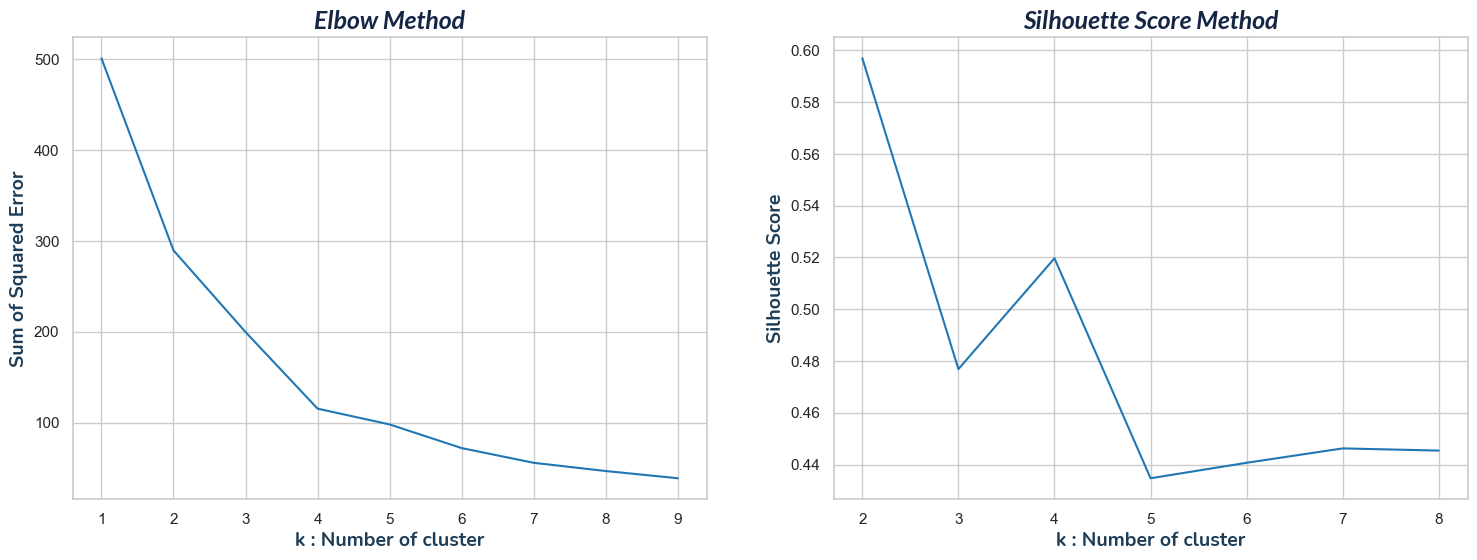

In [ ]:
# Determine the number of K cluserts
sse = {}
sil = []
max_k = 8

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Elbow Method
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=181).fit(data1)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    
sns.lineplot(x=list(sse.keys()), y=list(sse.values()), ax=ax[0])
ax[0].set_title('Elbow Method', fontdict=font_t)
ax[0].set_xlabel("k : Number of cluster", fontdict=font_l)
ax[0].set_ylabel("Sum of Squared Error", fontdict=font_l)
ax[0].grid();

# Silhouette Score Method
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=181).fit(data1)
    labels = kmeans.labels_
    sil.append(silhouette_score(data1, labels, metric='euclidean'))
    
sns.lineplot(x=range(2, max_k + 1), y=sil, ax=ax[1])
ax[1].set_title('Silhouette Score Method', fontdict=font_t)
ax[1].set_xlabel("k : Number of cluster", fontdict=font_l)
ax[1].set_ylabel("Silhouette Score", fontdict=font_l)
ax[1].grid();
fig.savefig(f"{pic_path}/Modeling - determine k for kmeans.png", dpi=300, transparent=True);

In [50]:
model = KMeans(n_clusters=4, max_iter=1000, random_state=181)
model.fit(data1)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_
df['group'] = labels
data1['group'] = labels
data1['group'] = data1['group'].astype('category')
df.groupby('group')['country'].count()

group
0    57
1    85
2    20
3     5
Name: country, dtype: int64

In [39]:
palette = ['#e5bbfb', "#BBDEFB",  '#64B5F6', "#1976D2"]
hover = df['country']
fig = px.scatter_3d(
    data1, 
    x=selected_features[0], 
    y=selected_features[1], 
    z=selected_features[2], 
    color='group', 
    hover_name=hover,
    height=720, width=1280, 
    template=custom_template,
    color_discrete_sequence=palette, 
    )

fig.add_trace(
    go.Scatter3d(
        x=centroids[:, 0],
        y=centroids[:, 1],
        z=centroids[:, 2],
        name=f'Centroids',
        mode='markers',
        marker=dict(
            size=10,
            color=mycolors['fox'],
            line=dict(width=2, color=mycolors['smoke']),
            # opacity=0.8
        ),
        marker_symbol='diamond'
    )
)
fig.update_layout(paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor="rgba(0,0,0,0)")
fig.write_html(f"{pic_path}/inter - Modeling - Scatter3D by kmeans with selceted features.html", )
fig.write_image(f"{pic_path}/Modeling - Scatter3D by kmeans with selceted features.png", scale=3, height=720, width=1280, )
    
fig.show()

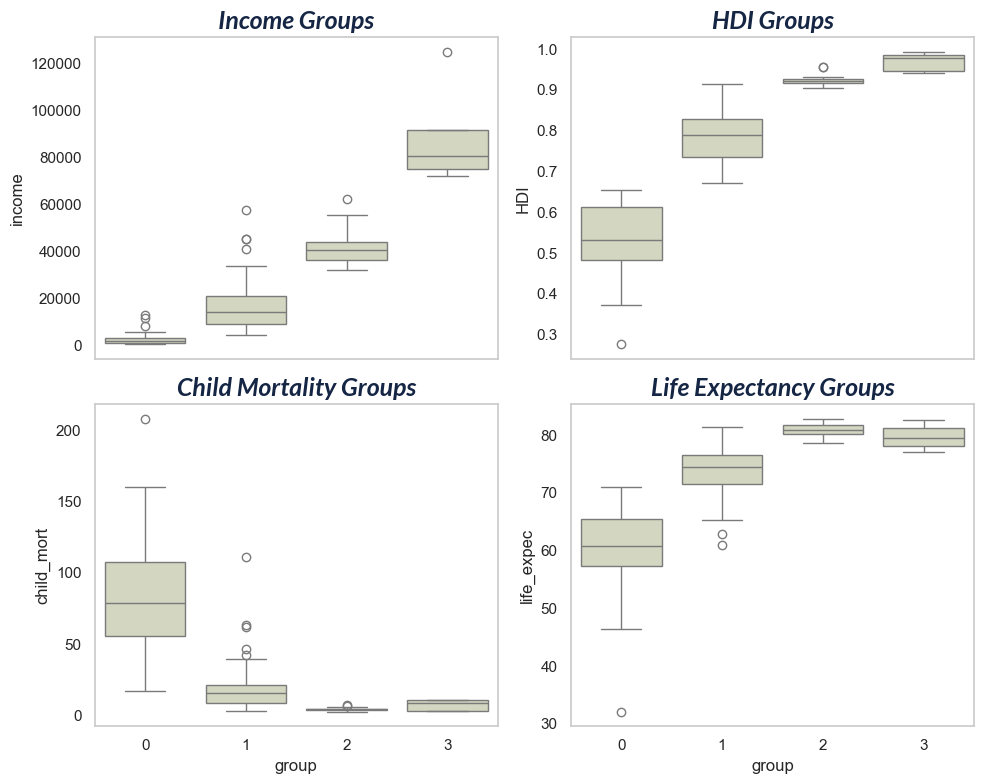

In [40]:
# Differentiate if the country group needs help
fig, ax = plt.subplots(2, 2, figsize=(10, 8), sharex=True,) # constrained_layout=True

sns.boxplot(df, x='group', y='income', color=mycolors['mid_green'], ax=ax[0][0])
ax[0][0].set_title('Income Groups', fontdict=font_t)

sns.boxplot(df, x='group', y='HDI', color=mycolors['mid_green'], ax=ax[0][1])
ax[0][1].set_title('HDI Groups', fontdict=font_t)

sns.boxplot(df, x='group', y='child_mort', color=mycolors['mid_green'], ax=ax[1][0])
ax[1][0].set_title('Child Mortality Groups', fontdict=font_t)

sns.boxplot(df, x='group', y='life_expec', color=mycolors['mid_green'], ax=ax[1][1])
ax[1][1].set_title('Life Expectancy Groups', fontdict=font_t)

plt.savefig(f"{pic_path}/Modeling - Boxplot to decide group by kmeans with selceted features.png", dpi=300, transparent=True);

plt.tight_layout();

In [ ]:
# data1['group'] = labels
data1['country'] = df['country']
data1['HDI'] = df['HDI']
data1['status'] = data1['group'].map({ 1 : 'Selective Aid', 0 : 'Priority Aid',  2 :'No Aid', 3 : 'No Aid'})
data1.groupby('status')['country'].count()

status
No Aid           25
Priority Aid     57
Selective Aid    85
Name: country, dtype: int64

In [58]:
palette_3 = ['#e5bbfb',  '#64B5F6', "#BBDEFB"]

fig = px.choropleth(
    data1, 
    locations="country",
    locationmode='country names',
    color='status',
    color_discrete_sequence=palette_3, # Set color
    custom_data=['status', 'HDI'],
    template=custom_template,
    category_orders={'color': ['Priority Aid', 'Selective Aid', 'No Aid']}, # Set color order
    title=format_title("Aid Status of Each Country", "K-means with selected features")
)

fig.update_traces(
    hoverinfo='location', # hoverinfo of choropleth: ['location', 'z', 'text', 'name']
    hovertemplate='Country=%{location}<br>Status=%{customdata[0]}<br>HDI=%{customdata[1]:.2f}<extra></extra>',
)

fig.update_layout(height=720, width=1280, margin=dict(t=70, l=25, r=25, b=0))
fig.update_geos(fitbounds="locations", visible=False, projection_type='equirectangular')
fig.write_image(f"{pic_path}/Choropleth - Kmeans with selected features.png", scale=3, width=1280, height=720, )
fig.write_html(f"{pic_path}/inter - Choropleth - Kmeans with selected features.html", )

fig.show()

### PCA Data

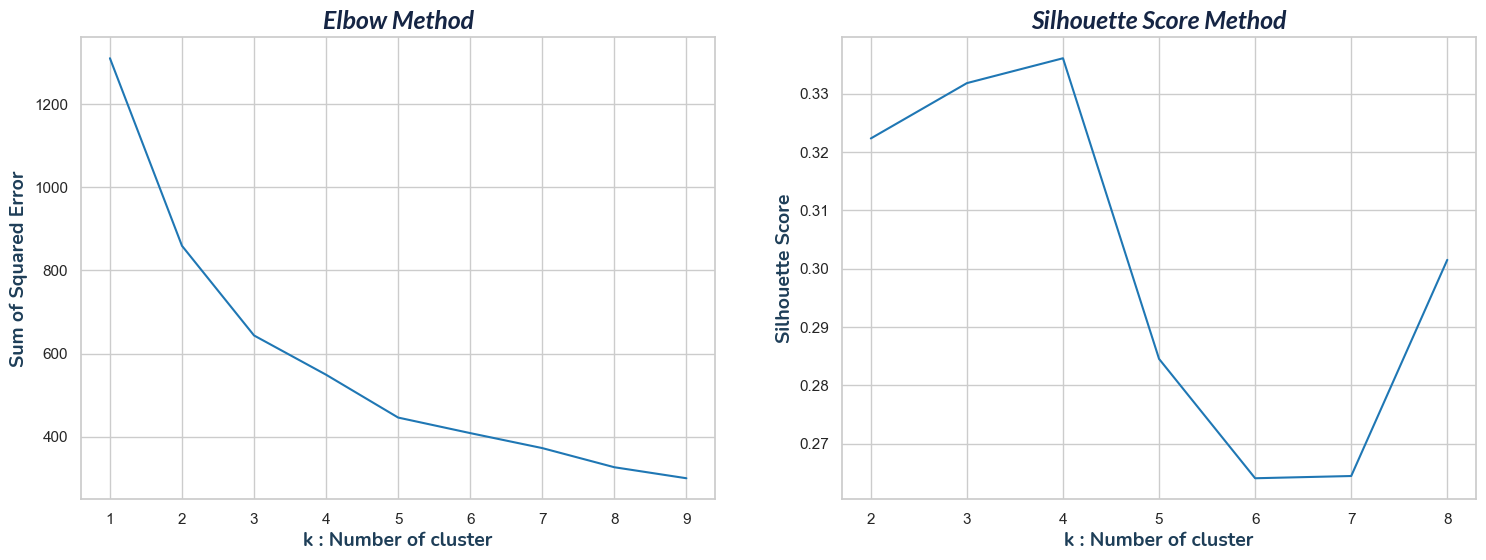

In [43]:
sse = {}
sil = []
max_k = 8

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Elbow Method
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=181).fit(data2)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    
sns.lineplot(x=list(sse.keys()), y=list(sse.values()), ax=ax[0])
ax[0].set_title('Elbow Method', fontdict=font_t)
ax[0].set_xlabel("k : Number of cluster", fontdict=font_l)
ax[0].set_ylabel("Sum of Squared Error", fontdict=font_l)
ax[0].grid();

# Silhouette Score Method
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=181).fit(data2)
    labels = kmeans.labels_
    sil.append(silhouette_score(data2, labels, metric='euclidean'))
    
sns.lineplot(x=range(2, max_k + 1), y=sil, ax=ax[1])
ax[1].set_title('Silhouette Score Method', fontdict=font_t)
ax[1].set_xlabel("k : Number of cluster", fontdict=font_l)
ax[1].set_ylabel("Silhouette Score", fontdict=font_l)
ax[1].grid();

In [59]:
model = KMeans(n_clusters=4, max_iter=1000, random_state=181)
model.fit(data2)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_
df['group'] = labels
data2['group'] = labels
data2['group'] = data2['group'].astype('category')
data2.columns = [f"PC {i+1}" for i in range(4)] + ['group']
df.groupby('group')['country'].count()

group
0    48
1    80
2    17
3    22
Name: country, dtype: int64

In [45]:
hover = df['country']
fig = px.scatter_3d(
    data2, 
    x='PC 1', 
    y='PC 2', 
    z='PC 3', 
    color='group', 
    height=720, width=1280, hover_name=hover,
    template=custom_template,
    color_discrete_sequence=palette, # Set color
    )

fig.add_trace(
    go.Scatter3d(
        x=centroids[:, 0],
        y=centroids[:, 1],
        z=centroids[:, 2],
        name=f'Centroids',
        mode='markers',
        marker=dict(
            size=10,
            color=mycolors['fox'],
            line=dict(width=2, color=mycolors['smoke']),
            # opacity=0.8
        ),
        marker_symbol='diamond'
    )
)

fig.update_layout(paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor="rgba(0,0,0,0)")
fig.write_html(f"{pic_path}/inter - Modeling - Scatter3D by kmeans with PCA features.html", )
fig.write_image(f"{pic_path}/Modeling - Scatter3D by kmeans with PCA features.png", scale=3, height=720, width=1280, )
    
fig.show()

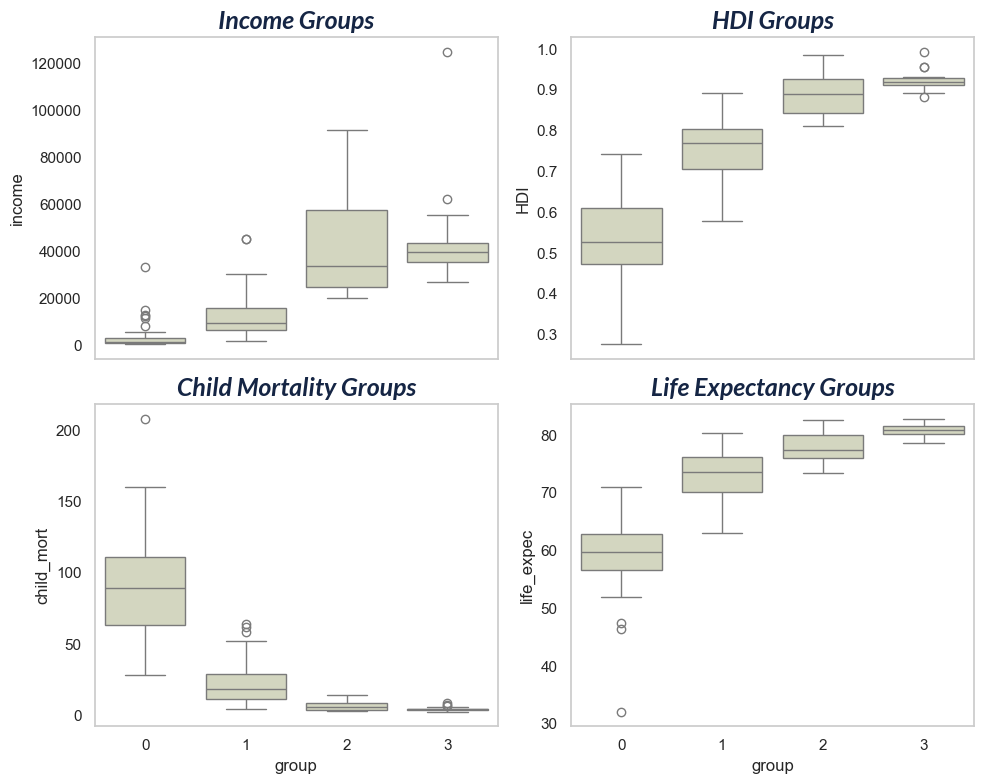

In [46]:
# Differentiate if the country group needs help
fig, ax = plt.subplots(2, 2, figsize=(10, 8), sharex=True,) # constrained_layout=True

sns.boxplot(df, x='group', y='income', color=mycolors['mid_green'], ax=ax[0][0])
ax[0][0].set_title('Income Groups', fontdict=font_t)

sns.boxplot(df, x='group', y='HDI', color=mycolors['mid_green'], ax=ax[0][1])
ax[0][1].set_title('HDI Groups', fontdict=font_t)

sns.boxplot(df, x='group', y='child_mort', color=mycolors['mid_green'], ax=ax[1][0])
ax[1][0].set_title('Child Mortality Groups', fontdict=font_t)

sns.boxplot(df, x='group', y='life_expec', color=mycolors['mid_green'], ax=ax[1][1])
ax[1][1].set_title('Life Expectancy Groups', fontdict=font_t)

plt.savefig(f"{pic_path}/Modeling - Boxplot to decide group by kmeans with PCA features.png", dpi=300, transparent=True);

plt.tight_layout();

In [61]:
# data2['group'] = labels
data2['country'] = df['country']
data2['HDI'] = df['HDI']
data2['status'] = data2['group'].map({ 1 : 'Selective Aid', 0 : 'Priority Aid',  2 :'No Aid', 3 : 'No Aid'})
data2.groupby('status')['country'].count()

status
No Aid           39
Priority Aid     48
Selective Aid    80
Name: country, dtype: int64

In [62]:
palette_3 = ['#e5bbfb',  '#64B5F6', "#BBDEFB"]

fig = px.choropleth(
    data2, 
    locations="country",
    locationmode='country names',
    color='status',
    color_discrete_sequence=palette_3, # Set color
    custom_data=['status', 'HDI'],
    template=custom_template,
    category_orders={'status': ['Priority Aid', 'Selective Aid', 'No Aid']}, # Set color order
    title=format_title("Aid Status of Each Country", "K-means with PCA features")
)

fig.update_traces(
    hoverinfo='location', # hoverinfo of choropleth: ['location', 'z', 'text', 'name']
    hovertemplate='Country=%{location}<br>Status=%{customdata[0]}<br>HDI=%{customdata[1]:.2f}<extra></extra>',
)

fig.update_layout(height=720, width=1280, margin=dict(t=70, l=25, r=25, b=0), )
fig.update_geos(fitbounds="locations", visible=False, projection_type='equirectangular')
fig.write_image(f"{pic_path}/Choropleth - Kmeans with PCA features.png", scale=3, width=1280, height=720, )
fig.write_html(f"{pic_path}/inter - Choropleth - Kmeans with PCA features.html", )

fig.show()

## Hierarchical Clustering

Deciding the Number of Clusters for Hierarchical Clustering: __*Dendrogram*__ and __*Linkage Functions*__

- **Dendrogram**:  

    Hierarchical Clustering builds a family tree of the data, and the dendrogram is the picture of that tree. It starts with every point as its own tiny cluster at the bottom. As we move up, points merge into bigger clusters based on how similar they are. The vertical lines show the distance between clusters when they join.

- **Linkage Functions**:  

    These are the rules for measuring distance between clusters, and they’re key to shaping the dendrogram. With `scipy.cluster.hierarchy`, we’ve chosen *ward linkage*, which uses the Ward variance minimization algorithm. 

- **Cut The Tree**:

    Since we don't have SSE like we did for K-means, and determining the height threshold needs more information, I used `cut_tree` function from `scipy.cluster.hierarchy` with the number of clusters (3, 4, 5, 6). Then, we plot the results and choose the most reasonable one based our knowledge of the dataset.

In [96]:
# Selected feature
scaling = StandardScaler()
data1 = df[selected_features]
data1 = pd.DataFrame(scaling.fit_transform(data1), columns=selected_features)

# PCA data, choosing the first 4 components
data2 = pd.DataFrame(components[:, range(4)])
data2.columns = [f"PC{i+1}" for i in range(4)]
print(f"Selected Data shape: {data1.shape}\nPCA Data shape: {data2.shape}")

Selected Data shape: (167, 3)
PCA Data shape: (167, 4)


### Selected Feature

In [128]:
colors = ["#1C3041", "#9B1D20", "#0B6E4F", "#895884", "#F07605", "#F5E400"]
hierarchy.set_link_color_palette(colors)

In [ ]:
Z = linkage(data1, method='ward', metric='euclidean')
cutree = cut_tree(Z, n_clusters=[3, 4, 5, 6])

167

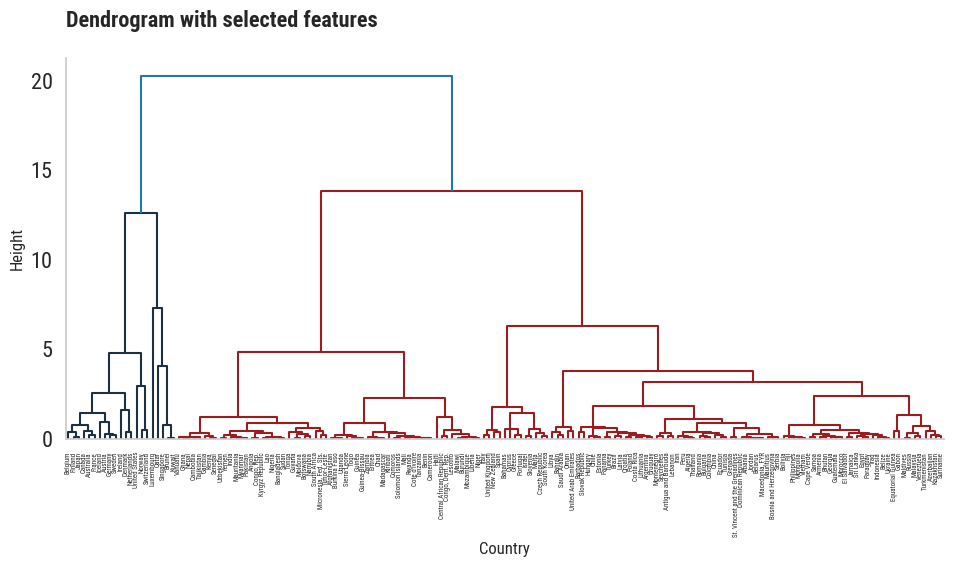

In [137]:
fig, ax = plt.subplots()

dendrogram(Z, labels=df['country'].tolist(), ax=ax)
ax.set_ylabel("Height",)
ax.set_xlabel("Country",)
ax.set_title(f"Dendrogram with selected features", loc="left", fontdict={"weight": "bold", "size" : 16}, y=1.06)
fig.savefig(f"{pic_path}/Modeling - Dendrogram with selected features.png", dpi=300, transparent=True);
plt.tight_layout()

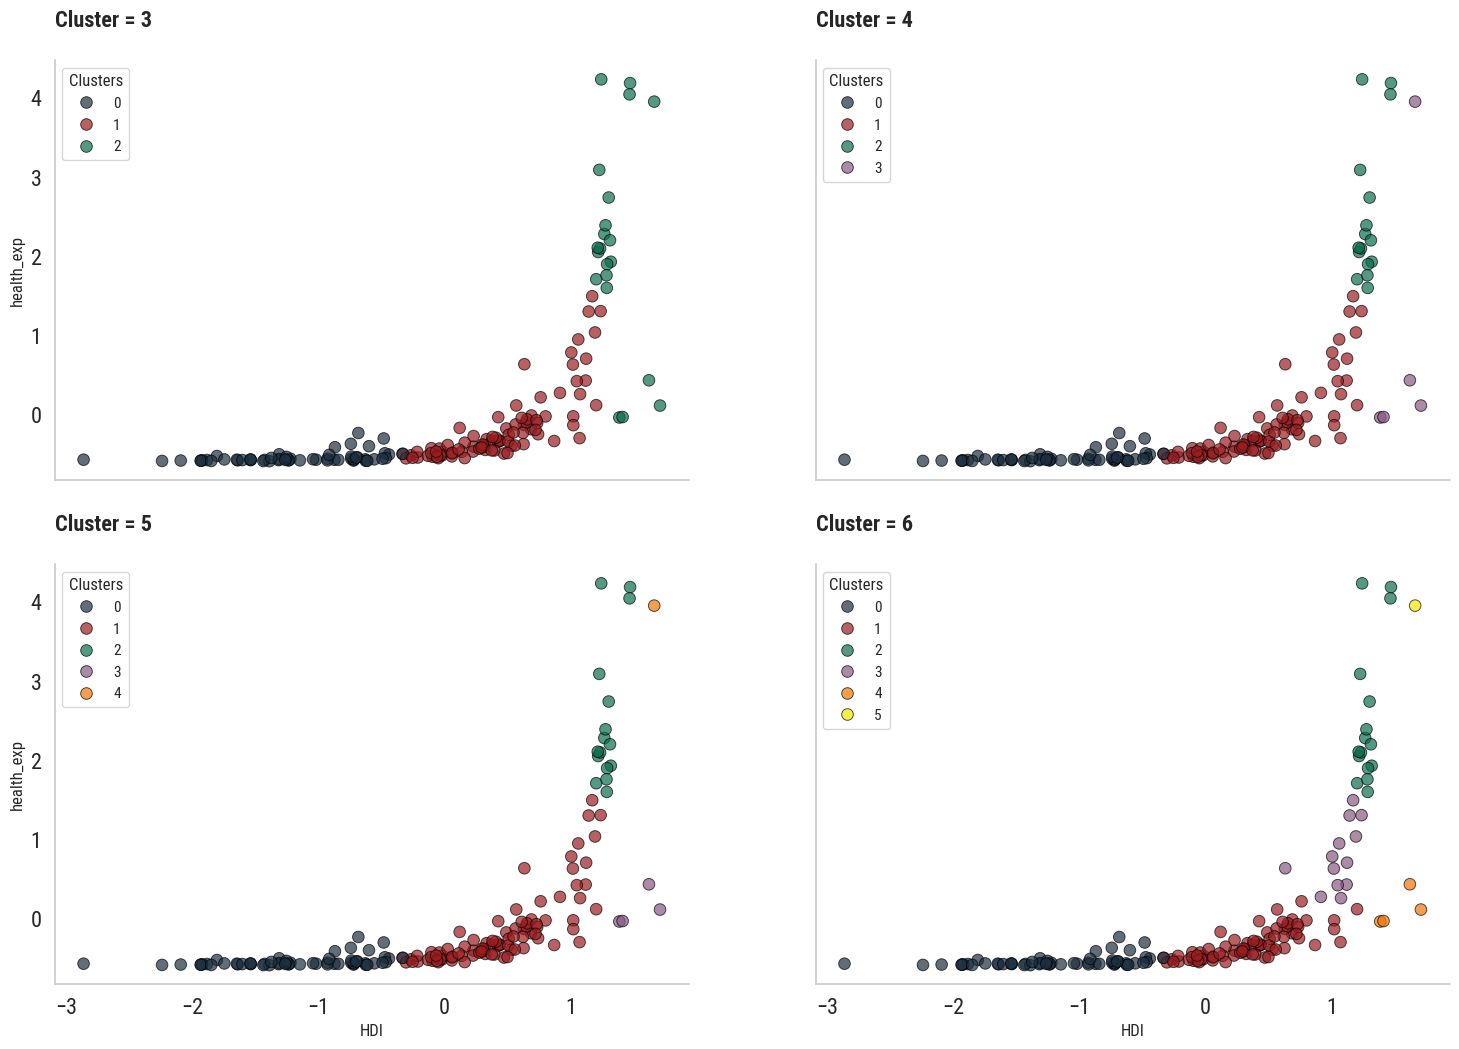

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(18, 12), sharex=True, sharey=True)
temp = data1.copy()
for i, ax in enumerate(axs.flatten()):
    # explained_variance = pca.explained_variance_ratio_[i] * 100
    # pc = f"PC{i+1}"
    # bars = ax.bar(loadings.index, loadings[pc], color=colors[i], edgecolor="#000000", linewidth=1.2)
    temp['group'] = cutree[:, i]
    sns.scatterplot(temp, x='HDI', y='health_exp', hue='group', palette=colors, edgecolors="#000000", s=70, alpha=0.7, ax=ax)
    ax.set_title(f"Cluster = {cutree[:, i].max()+1}", loc="left", fontdict={"weight": "bold", "size" : 16}, y=1.06)
    ax.set_xlabel("HDI")
    ax.set_ylabel("health_exp")
    ax.legend(title="Clusters")
    
fig.savefig(f"{pic_path}/Modeling - Hierarchical Clustering Plot with selected features.png", dpi=300, transparent=True);

In [142]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
labels = hierarchical_cluster.fit(data1)

pred_agc = pd.Series(hierarchical_cluster.labels_)
df['group'] = pred_agc
data1['group'] = pred_agc
data1['group'] = data1['group'].astype('category')
df.groupby('group')['country'].count()

group
0     5
1    88
2    58
3    16
Name: country, dtype: int64

In [60]:
hover = df['country']
fig = px.scatter_3d(
    data1, 
    x=selected_features[0], 
    y=selected_features[1], 
    z=selected_features[2], 
    color='group', 
    height=720, width=1280, hover_name=hover,
    template=custom_template,
    color_discrete_sequence=palette_3[:2], # Set color
    # category_orders={'color': [1, 2, 3, 4]}, # Set color order
    )
    
fig.show()

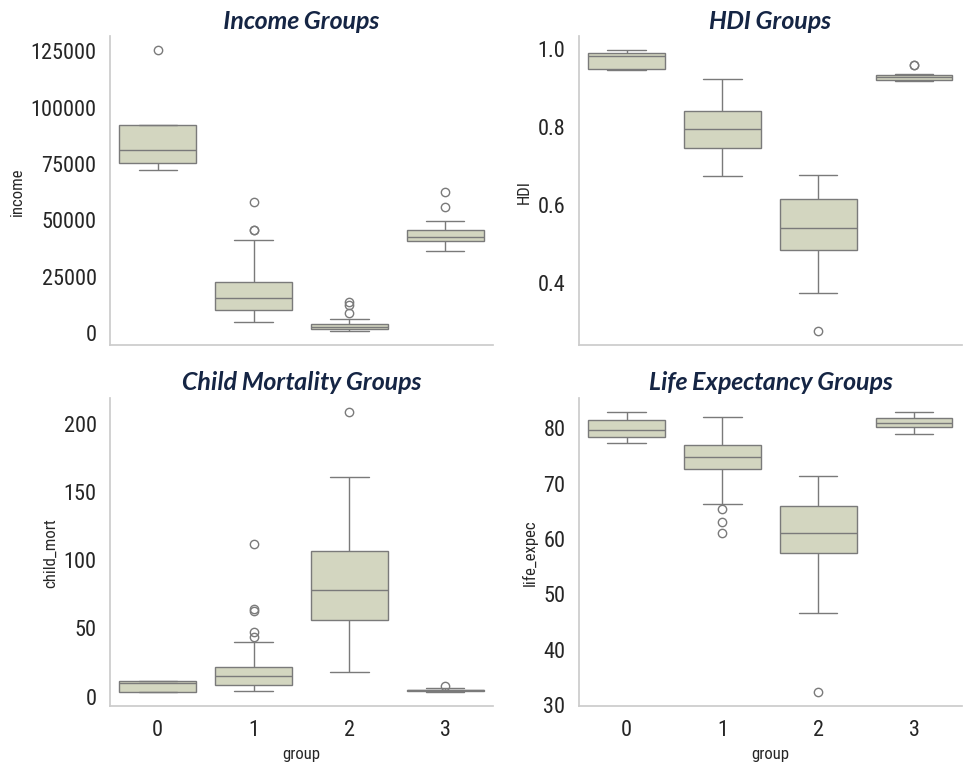

In [143]:
# Differentiate if the country group needs help
fig, ax = plt.subplots(2, 2, figsize=(10, 8), sharex=True,) # constrained_layout=True

sns.boxplot(df, x='group', y='income', color=mycolors['mid_green'], ax=ax[0][0])
ax[0][0].set_title('Income Groups', fontdict=font_t)

sns.boxplot(df, x='group', y='HDI', color=mycolors['mid_green'], ax=ax[0][1])
ax[0][1].set_title('HDI Groups', fontdict=font_t)

sns.boxplot(df, x='group', y='child_mort', color=mycolors['mid_green'], ax=ax[1][0])
ax[1][0].set_title('Child Mortality Groups', fontdict=font_t)

sns.boxplot(df, x='group', y='life_expec', color=mycolors['mid_green'], ax=ax[1][1])
ax[1][1].set_title('Life Expectancy Groups', fontdict=font_t)

plt.tight_layout();

In [144]:
# data1['group'] = labels
data1['country'] = df['country']
data1['HDI'] = df['HDI']
data1['status'] = data1['group'].map({ 1 : 'Selective Aid', 2 : 'Priority Aid',  0 :'No Aid', 3 : 'No Aid'})
data1.groupby('status')['country'].count()

status
No Aid           21
Priority Aid     58
Selective Aid    88
Name: country, dtype: int64

In [147]:
# palette_3 = ['#e5bbfb',  '#64B5F6', "#BBDEFB"]

fig = px.choropleth(
    data1, 
    locations="country",
    locationmode='country names',
    color='status',
    color_discrete_sequence=palette_3, # Set color
    custom_data=['status', 'HDI'],
    template=custom_template,
    category_orders={'status': ['Priority Aid', 'Selective Aid', 'No Aid']},
    title=format_title("Aid Status of Each Country", "Hierarchical Clustering with selected features")
)

fig.update_traces(
    hoverinfo='location', # hoverinfo of choropleth: ['location', 'z', 'text', 'name']
    hovertemplate='Country=%{location}<br>Status=%{customdata[0]}<br>HDI=%{customdata[1]:.2f}<extra></extra>',
)

fig.update_layout(height=720, width=1280, margin=dict(t=70, l=25, r=25, b=0), )
fig.update_geos(fitbounds="locations", visible=False, projection_type='equirectangular')
fig.write_image(f"{pic_path}/Choropleth - Hierarchical Clustering with selected features.png", scale=3, height=720, width=1280, )
fig.write_html(f"{pic_path}/inter - Choropleth - Hierarchical Clustering with selected features.html", )

fig.show()

### PCA Data

In [139]:
Z = linkage(data2, method='ward', metric='euclidean')
cutree = cut_tree(Z, n_clusters=[3, 4, 5, 6])

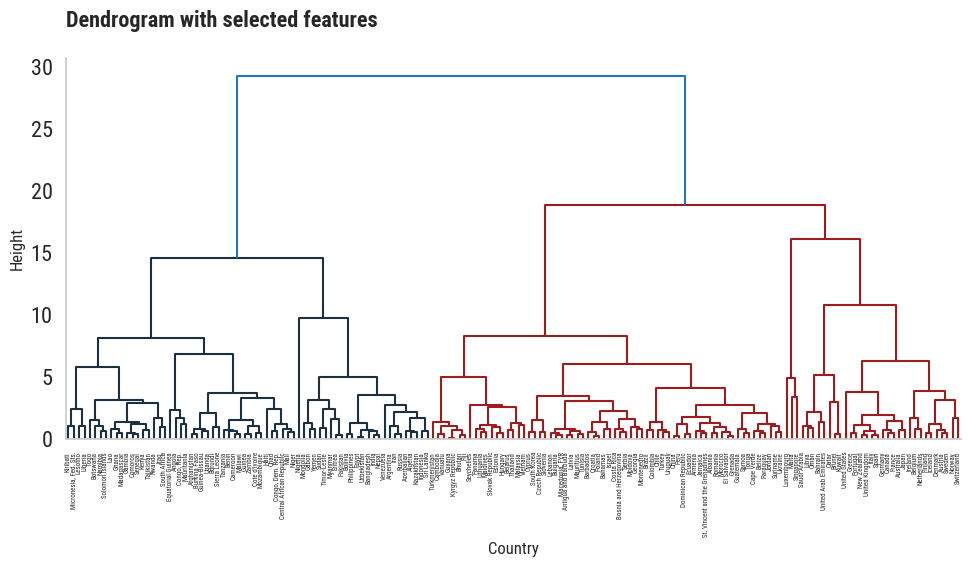

In [140]:
fig, ax = plt.subplots()

dendrogram(Z, labels=df['country'].tolist(), ax=ax)
ax.set_ylabel("Height",)
ax.set_xlabel("Country",)
ax.set_title(f"Dendrogram with selected features", loc="left", fontdict={"weight": "bold", "size" : 16}, y=1.06)
fig.savefig(f"{pic_path}/Modeling - Dendrogram with PCA features.png", dpi=300, transparent=True);
plt.tight_layout()

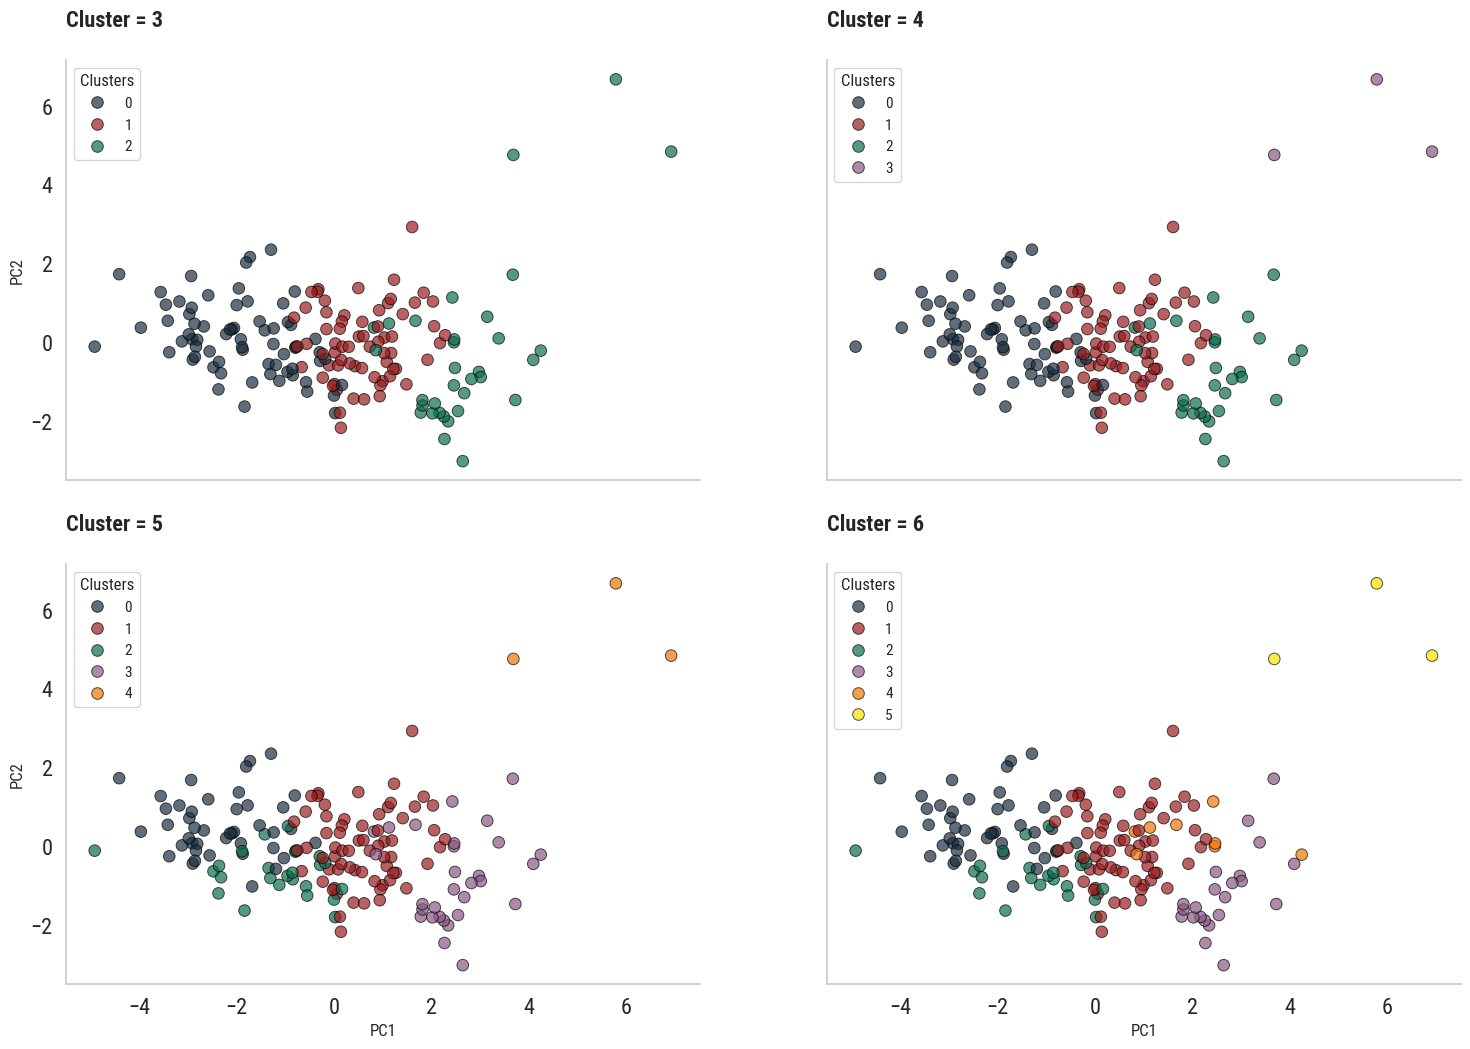

In [141]:
fig, axs = plt.subplots(2, 2, figsize=(18, 12), sharex=True, sharey=True)
temp = data2.copy()
for i, ax in enumerate(axs.flatten()):
    # explained_variance = pca.explained_variance_ratio_[i] * 100
    # pc = f"PC{i+1}"
    # bars = ax.bar(loadings.index, loadings[pc], color=colors[i], edgecolor="#000000", linewidth=1.2)
    temp['group'] = cutree[:, i]
    sns.scatterplot(temp, x='PC1', y='PC2', hue='group', palette=colors, edgecolors="#000000", s=70, alpha=0.7, ax=ax)
    ax.set_title(f"Cluster = {cutree[:, i].max()+1}", loc="left", fontdict={"weight": "bold", "size" : 16}, y=1.06)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.legend(title="Clusters")
    
fig.savefig(f"{pic_path}/Modeling - Hierarchical Clustering Plot with PCA features.png", dpi=300, transparent=True);

In [149]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels = hierarchical_cluster.fit(data2)

pred_agc = pd.Series(hierarchical_cluster.labels_)
df['group'] = pred_agc
data2['group'] = pred_agc
data2['group'] = data2['group'].astype('category')
df.groupby('group')['country'].count()

group
0    33
1    68
2    66
Name: country, dtype: int64

In [68]:
hover = df['country']
fig = px.scatter_3d(
    data2, 
    x='PC 1', 
    y='PC 2', 
    z='PC 3', 
    color='group', 
    height=800, width=1000, hover_name=hover,
    template=custom_template,
    color_discrete_sequence=palette_3[:2], # Set color
    # category_orders={'color': [1, 2, 3, 4]}, # Set color order
    )
    
fig.show()

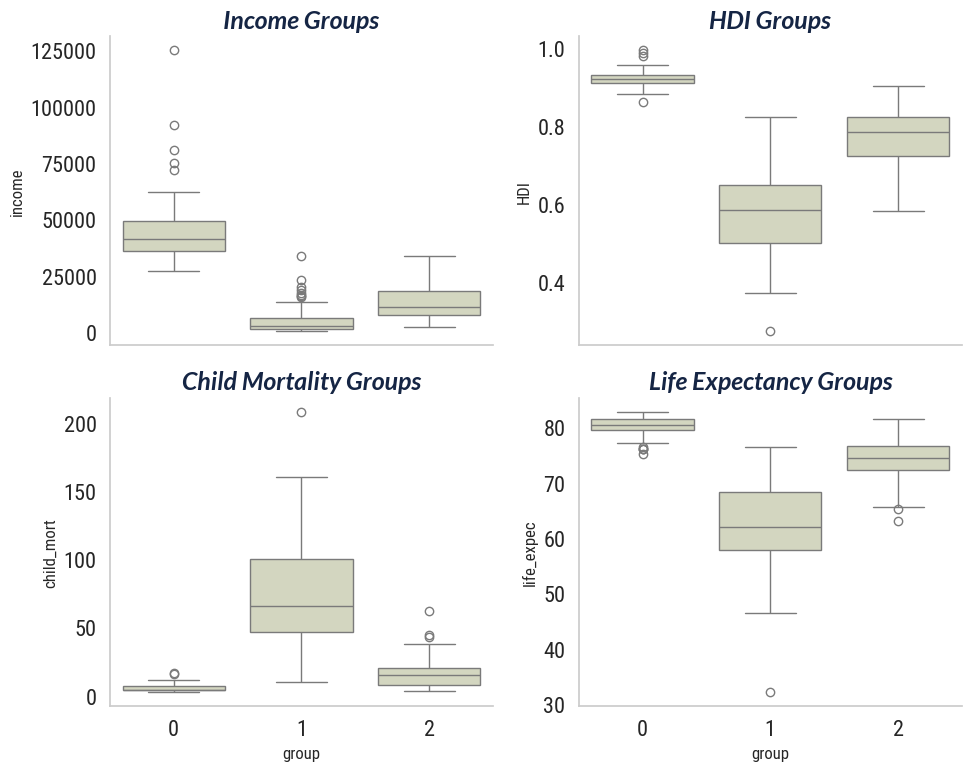

In [150]:
# Differentiate if the country group needs help
fig, ax = plt.subplots(2, 2, figsize=(10, 8), sharex=True,) # constrained_layout=True

sns.boxplot(df, x='group', y='income', color=mycolors['mid_green'], ax=ax[0][0])
ax[0][0].set_title('Income Groups', fontdict=font_t)

sns.boxplot(df, x='group', y='HDI', color=mycolors['mid_green'], ax=ax[0][1])
ax[0][1].set_title('HDI Groups', fontdict=font_t)

sns.boxplot(df, x='group', y='child_mort', color=mycolors['mid_green'], ax=ax[1][0])
ax[1][0].set_title('Child Mortality Groups', fontdict=font_t)

sns.boxplot(df, x='group', y='life_expec', color=mycolors['mid_green'], ax=ax[1][1])
ax[1][1].set_title('Life Expectancy Groups', fontdict=font_t)

plt.tight_layout();

In [151]:
data2['country'] = df['country']
data2['HDI'] = df['HDI']
data2['status'] = data2['group'].map({1 : 'Priority Aid', 2 : 'Selective Aid', 0 :'No Aid',})
data2.groupby('status')['country'].count()

status
No Aid           33
Priority Aid     68
Selective Aid    66
Name: country, dtype: int64

In [152]:
fig = px.choropleth(
    data2, 
    locations="country",
    locationmode='country names',
    color='status',
    color_discrete_sequence=palette_3, # Set color
    custom_data=['status', 'HDI'],
    template=custom_template,
    category_orders={'status': ['Priority Aid', 'Selective Aid', 'No Aid']},
    title=format_title("Aid Status of Each Country", "Hierarchical Clustering with PCA features")
)

fig.update_traces(
    hoverinfo='location', # hoverinfo of choropleth: ['location', 'z', 'text', 'name']
    hovertemplate='Country=%{location}<br>Status=%{customdata[0]}<br>HDI=%{customdata[1]:.2f}<extra></extra>',
)

fig.update_layout(height=720, width=1280, margin=dict(t=70, l=25, r=25, b=0), )
fig.update_geos(fitbounds="locations", visible=False, projection_type='equirectangular')
fig.write_image(f"{pic_path}/Choropleth - Hierarchical Clustering with PCA features.png", scale=3, height=720, width=1280, )
fig.write_html(f"{pic_path}/inter - Choropleth - Hierarchical Clustering with PCA features.html", )

fig.show()

# Conclusion

Before sharing my findings, I’d like to thank the Kaggle notebook, [Clustering: PCA| K-Means - DBSCAN - Hierarchical |](https://www.kaggle.com/code/tanmay111999/clustering-pca-k-means-dbscan-hierarchical#Modeling), for some great inspiration.

In this project, I grouped countries based on socio-economic and health factors to help HELP International figure out which ones need aid the most. Using K-means and Hierarchical clustering algorithms with both hand-picked features and PCA components, I noticed a couple of things:

1. __K-means plays it safe__: 

    No matter which set of features was used, K-means led to fewer `Priority Aid` countries.

2. __Feature Engineering keeps it consistent__: 

    No matter which clustering method I used, hand-picked features features led to almost the same countries classified as `Priority Aid`.

The choropleth maps in the Modeling section show these differences pretty clearly across algorithms and feature sets.

These findings give HELP International a starting point for sorting countries into aid categories using unsupervised learning algorithms. But since this is about humanitarian aid, it’s not just about the data—more detailed analysis and input from domain experts are needed to nail down the final list of countries that need help.
